In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("final_data_aqi.xlsx")

In [3]:
data.head()

,Unnamed: 0,Average_Temp,Max_Temp,Min_Temp,Atm_Pressure,Average_relative_humidity(%),Total_rainfall_snowmelt(mm),Average_visibility,Average_wind_speed,Maximum_sustained_wind_speed,PM2.5
0,0,7.4,9.8,4.8,1017.6,93,0.0,0.5,4.3,9.4,219.720833
1,1,7.8,12.7,4.4,1018.5,87,0.0,0.6,4.4,11.1,182.187500
2,2,6.7,13.4,2.4,1019.4,82,0.0,0.6,4.8,11.1,154.037500
3,3,8.6,15.5,3.3,1018.7,72,0.0,0.8,8.1,20.6,223.208333
4,4,12.4,20.9,4.4,1017.3,61,0.0,1.3,8.7,22.2,200.645833


In [4]:
data.columns

Index(['Unnamed: 0', 'Average_Temp', 'Max_Temp', 'Min_Temp', 'Atm_Pressure',
       'Average_relative_humidity(%)', 'Total_rainfall_snowmelt(mm)',
       'Average_visibility', 'Average_wind_speed',
       'Maximum_sustained_wind_speed', 'PM2.5'],
      dtype='object')

In [5]:
data.drop("Unnamed: 0", axis = 1, inplace= True)

In [6]:
data.head()

,Average_Temp,Max_Temp,Min_Temp,Atm_Pressure,Average_relative_humidity(%),Total_rainfall_snowmelt(mm),Average_visibility,Average_wind_speed,Maximum_sustained_wind_speed,PM2.5
0,7.4,9.8,4.8,1017.6,93,0.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87,0.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82,0.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72,0.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61,0.0,1.3,8.7,22.2,200.645833


In [7]:
#check for outliers:
Q1 = np.quantile(data, 0.25)
Q3 = np.quantile(data, 0.75)
IQR = Q3 - Q1



In [8]:
((data < (Q1- 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

Average_Temp                       0
Max_Temp                           0
Min_Temp                           0
Atm_Pressure                    1028
Average_relative_humidity(%)       0
Total_rainfall_snowmelt(mm)        1
Average_visibility                 0
Average_wind_speed                 0
Maximum_sustained_wind_speed       0
PM2.5                            363
dtype: int64

In [9]:
#check for skewness
data.skew()

Average_Temp                   -0.400793
Max_Temp                       -0.482045
Min_Temp                       -0.312132
Atm_Pressure                   -0.084276
Average_relative_humidity(%)   -0.381071
Total_rainfall_snowmelt(mm)     9.193764
Average_visibility              0.044529
Average_wind_speed              0.763959
Maximum_sustained_wind_speed    1.413430
PM2.5                           0.997217
dtype: float64

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


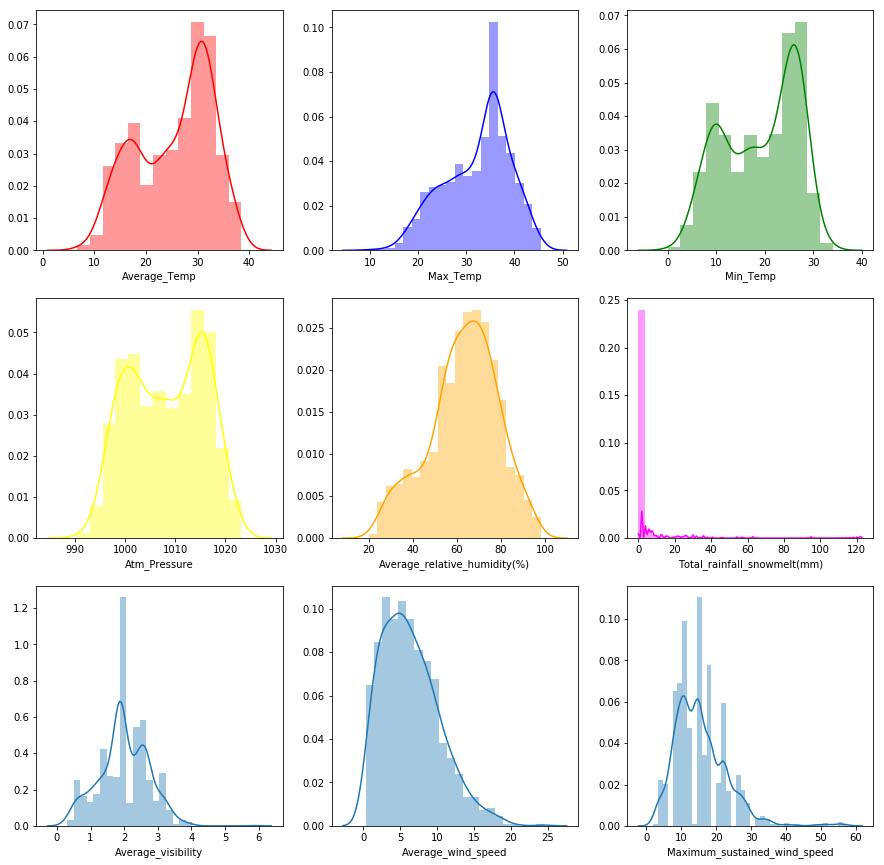

In [10]:
#visualization of skewness
fig, ax = plt.subplots(3,3, figsize = (15,15))
sns.distplot(data["Average_Temp"], kde =True, color= "red", ax = ax [0,0])
sns.distplot(data["Max_Temp"], kde =True, color= "blue", ax = ax [0,1])
sns.distplot(data["Min_Temp"], kde =True, color= "green", ax = ax [0,2])
sns.distplot(data["Atm_Pressure"], kde =True, color= "yellow", ax = ax [1,0])
sns.distplot(data["Average_relative_humidity(%)"], kde =True, color= "orange", ax = ax [1,1])
sns.distplot(data["Total_rainfall_snowmelt(mm)"], kde =True, color= "magenta", ax = ax [1,2])
sns.distplot(data["Average_visibility"], kde =True, ax = ax [2,0])
sns.distplot(data["Average_wind_speed"], kde =True, ax = ax [2,1])
sns.distplot(data["Maximum_sustained_wind_speed"], kde =True, ax = ax [2,2])

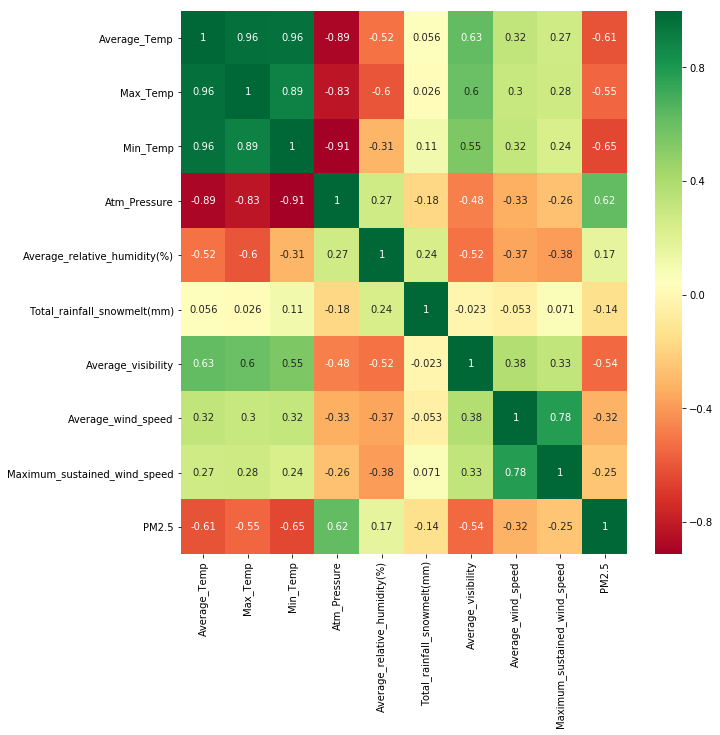

In [11]:
#correlation
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot= True, cmap = "RdYlGn")

In [12]:
data.drop(["Average_relative_humidity(%)", "Total_rainfall_snowmelt(mm)", "Average_wind_speed", "Maximum_sustained_wind_speed"], axis = 1, inplace = True)

In [13]:
# Independent Variable
x= data.iloc[:, :-1]
# Dependent Variale
y = data.iloc[:, -1]

In [24]:
# Train, Test and Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# XGBOOST REGRESSOR

In [25]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

[19:33:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [26]:
xgb.score(x_train, y_train)

0.7462487223962435

In [27]:
xgb.score(x_test,y_test)

0.5329137829001247

In [29]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb, x, y, cv = 5, verbose = 3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  ................................................................
[19:35:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ....................... , score=0.6011288690370911, total=   0.7s
[CV]  ................................................................
[19:35:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ....................... , score=0.3478872708417028, total=   0.0s
[CV]  ................................................................
[19:35:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ........................ , score=0.482146730471031, total=   0.0s
[CV]  ................................................................
[19:35:09] 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] ....................... , score=0.5010690607137114, total=   0.0s
[CV]  ................................................................
[19:35:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ....................... , score=0.4830543586015118, total=   0.0s


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished


In [30]:
score.mean()

0.4830572579330096

# Model Evaluation

In [31]:
xgb_pred = xgb.predict(x_test)

In [32]:
xgb_residual = y_test - xgb_pred

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


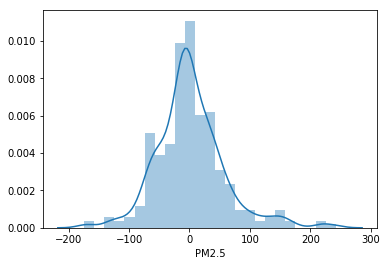

In [33]:
sns.distplot(xgb_residual)

# Hypermeter Tuning

In [ ]:
XGBRegressor()

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
parameter = dict(booster=['gbtree', "dart", "gblinear"], gamma=[0,1,2,3,5,5,6,7,8,9,10], n_estimators=[int(x) for x in np.linspace(100,1200,num = 12)], min_child_weight=[1,3,5,6,7,8], max_depth=[int(x) for x in np.linspace(5,30, num = 6)], learning_rate=[0.05,0.1, 0.2, 0.5, 0.6,0.8, 0.9, 1],subsample=[0.1,0.3,0.5,0.7,0.8, 1])

In [36]:
xgb_regressor = RandomizedSearchCV(xgb, parameter, n_iter= 100, scoring  = "neg_mean_squared_error", verbose = 3, cv = 5)

In [38]:
xgb_regressor.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.3, n_estimators=300, min_child_weight=6, max_depth=25, learning_rate=0.1, gamma=7, booster=gblinear 
[20:06:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.3, n_estimators=300, min_child_weight=6, max_depth=25, learning_rate=0.1, gamma=7, booster=gblinear, score=-3673.361117681301, total=   0.1s
[CV] subsample=0.3, n_estimators=300, min_child_weight=6, max_depth=25, learning_rate=0.1, gamma=7, booster=gblinear 
[20:06:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=300, min_child_weight=6, max_depth=25, learning_rate=0.1, gamma=7, booster=gblinear, score=-3882.4861897011215, total=   0.0s
[CV] subsample=0.3, n_estimators=300, min_child_weight=6, max_depth=25, learning_rate=0.1, gamma=7, booster=gblinear 
[20:06:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.3, n_estimators=300, min_child_weight=6, max_depth=25, learning_rate=0.1, gamma=7, booster=gblinear, score=-3595.8465483079544, total=   0.0s
[CV] subsample=0.3, n_estimators=300, min_child_weight=6, max_depth=25, learning_rate=0.1, gamma=7, booster=gblinear 
[20:06:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=300, min_child_weight=6, max_depth=25, learning_rate=0.1, gamma=7, booster=gblinear, score=-4067.08810103424, total=   0.0s
[CV] subsample=0.3, n_estimators=300, min_child_weight=6, max_depth=25, learning_rate=0.1, gamma=7, booster=gblinear 
[20:06:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.3, n_estimators=300, min_child_weight=6, max_depth=25, learning_rate=0.1, gamma=7, booster=gblinear, score=-4006.0757932361553, total=   0.0s
[CV] subsample=1, n_estimators=300, min_child_weight=3, max_depth=30, learning_rate=0.8, gamma=9, booster=gbtree 
[20:06:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=300, min_child_weight=3, max_depth=30, learning_rate=0.8, gamma=9, booster=gbtree, score=-5339.535883842816, total=   0.5s
[CV] subsample=1, n_estimators=300, min_child_weight=3, max_depth=30, learning_rate=0.8, gamma=9, booster=gbtree 
[20:06:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=300, min_child_weight=3, max_depth=30, learning_rate=0.8, gamma=9, booster=gbtree, score=-5154.41823120247, total=   0.5s
[CV] subsample=1, n_estimators=300, min_child_weight=3, max_depth=30, learning_rate=0.8, gamma=9, booster=gbtree 
[20:06:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=300, min_child_weight=3, max_depth=30, learning_rate=0.8, gamma=9, booster=gbtree, score=-6210.189600305116, total=   0.4s
[CV] subsample=1, n_estimators=300, min_child_weight=3, max_depth=30, learning_rate=0.8, gamma=9, booster=gbtree 
[20:06:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=300, min_child_weight=3, max_depth=30, learning_rate=0.8, gamma=9, booster=gbtree, score=-4155.538138316462, total=   0.5s
[CV] subsample=1, n_estimators=300, min_child_weight=3, max_depth=30, learning_rate=0.8, gamma=9, booster=gbtree 
[20:06:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=300, min_child_weight=3, max_depth=30, learning_rate=0.8, gamma=9, booster=gbtree, score=-4103.9055369714215, total=   0.6s
[CV] subsample=1, n_estimators=1200, min_child_weight=1, max_depth=5, learning_rate=0.5, gamma=3, booster=gbtree 
[20:06:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=1200, min_child_weight=1, max_depth=5, learning_rate=0.5, gamma=3, booster=gbtree, score=-4621.762702496717, total=   0.9s
[CV] subsample=1, n_estimators=1200, min_child_weight=1, max_depth=5, learning_rate=0.5, gamma=3, booster=gbtree 
[20:06:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=1200, min_child_weight=1, max_depth=5, learning_rate=0.5, gamma=3, booster=gbtree, score=-5010.564811869071, total=   0.6s
[CV] subsample=1, n_estimators=1200, min_child_weight=1, max_depth=5, learning_rate=0.5, gamma=3, booster=gbtree 
[20:06:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=1200, min_child_weight=1, max_depth=5, learning_rate=0.5, gamma=3, booster=gbtree, score=-5564.668565584648, total=   0.7s
[CV] subsample=1, n_estimators=1200, min_child_weight=1, max_depth=5, learning_rate=0.5, gamma=3, booster=gbtree 
[20:06:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=1200, min_child_weight=1, max_depth=5, learning_rate=0.5, gamma=3, booster=gbtree, score=-4258.432792331932, total=   0.6s
[CV] subsample=1, n_estimators=1200, min_child_weight=1, max_depth=5, learning_rate=0.5, gamma=3, booster=gbtree 
[20:06:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=1200, min_child_weight=1, max_depth=5, learning_rate=0.5, gamma=3, booster=gbtree, score=-3890.638327775462, total=   0.6s
[CV] subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=10, learning_rate=0.2, gamma=7, booster=gbtree 
[20:06:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=10, learning_rate=0.2, gamma=7, booster=gbtree, score=-4695.870738198184, total=   0.4s
[CV] subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=10, learning_rate=0.2, gamma=7, booster=gbtree 
[20:06:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=10, learning_rate=0.2, gamma=7, booster=gbtree, score=-5624.3985850323415, total=   0.4s
[CV] subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=10, learning_rate=0.2, gamma=7, booster=gbtree 
[20:06:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=10, learning_rate=0.2, gamma=7, booster=gbtree, score=-5184.533660380338, total=   0.4s
[CV] subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=10, learning_rate=0.2, gamma=7, booster=gbtree 
[20:06:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=10, learning_rate=0.2, gamma=7, booster=gbtree, score=-4219.0678413006335, total=   0.5s
[CV] subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=10, learning_rate=0.2, gamma=7, booster=gbtree 
[20:06:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=10, learning_rate=0.2, gamma=7, booster=gbtree, score=-3796.624650164408, total=   0.4s
[CV] subsample=0.5, n_estimators=700, min_child_weight=1, max_depth=20, learning_rate=0.05, gamma=5, booster=gbtree 
[20:06:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=700, min_child_weight=1, max_depth=20, learning_rate=0.05, gamma=5, booster=gbtree, score=-4506.155638896188, total=   1.0s
[CV] subsample=0.5, n_estimators=700, min_child_weight=1, max_depth=20, learning_rate=0.05, gamma=5, booster=gbtree 
[20:06:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=700, min_child_weight=1, max_depth=20, learning_rate=0.05, gamma=5, booster=gbtree, score=-4647.872223174542, total=   1.0s
[CV] subsample=0.5, n_estimators=700, min_child_weight=1, max_depth=20, learning_rate=0.05, gamma=5, booster=gbtree 
[20:06:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=700, min_child_weight=1, max_depth=20, learning_rate=0.05, gamma=5, booster=gbtree, score=-4670.405416635497, total=   1.0s
[CV] subsample=0.5, n_estimators=700, min_child_weight=1, max_depth=20, learning_rate=0.05, gamma=5, booster=gbtree 
[20:06:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=700, min_child_weight=1, max_depth=20, learning_rate=0.05, gamma=5, booster=gbtree, score=-3954.083162365897, total=   1.0s
[CV] subsample=0.5, n_estimators=700, min_child_weight=1, max_depth=20, learning_rate=0.05, gamma=5, booster=gbtree 
[20:06:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=700, min_child_weight=1, max_depth=20, learning_rate=0.05, gamma=5, booster=gbtree, score=-3690.109403604321, total=   1.0s
[CV] subsample=0.5, n_estimators=100, min_child_weight=8, max_depth=10, learning_rate=0.05, gamma=1, booster=dart 
[20:06:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=100, min_child_weight=8, max_depth=10, learning_rate=0.05, gamma=1, booster=dart, score=-3612.8880033227647, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=8, max_depth=10, learning_rate=0.05, gamma=1, booster=dart 
[20:06:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=100, min_child_weight=8, max_depth=10, learning_rate=0.05, gamma=1, booster=dart, score=-3484.5295657508123, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=8, max_depth=10, learning_rate=0.05, gamma=1, booster=dart 
[20:06:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=100, min_child_weight=8, max_depth=10, learning_rate=0.05, gamma=1, booster=dart, score=-3827.860281811505, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=8, max_depth=10, learning_rate=0.05, gamma=1, booster=dart 
[20:06:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=100, min_child_weight=8, max_depth=10, learning_rate=0.05, gamma=1, booster=dart, score=-3666.1739272991877, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=8, max_depth=10, learning_rate=0.05, gamma=1, booster=dart 
[20:06:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=100, min_child_weight=8, max_depth=10, learning_rate=0.05, gamma=1, booster=dart, score=-3159.819854665153, total=   0.1s
[CV] subsample=0.1, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=0.2, gamma=6, booster=dart 
[20:06:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=0.2, gamma=6, booster=dart, score=-6509.976351305939, total=   1.0s
[CV] subsample=0.1, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=0.2, gamma=6, booster=dart 
[20:06:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=0.2, gamma=6, booster=dart, score=-5892.079265213284, total=   1.0s
[CV] subsample=0.1, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=0.2, gamma=6, booster=dart 
[20:06:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=0.2, gamma=6, booster=dart, score=-4932.338691629802, total=   1.0s
[CV] subsample=0.1, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=0.2, gamma=6, booster=dart 
[20:06:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=0.2, gamma=6, booster=dart, score=-4827.867637258613, total=   1.0s
[CV] subsample=0.1, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=0.2, gamma=6, booster=dart 
[20:06:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=0.2, gamma=6, booster=dart, score=-4650.516409359549, total=   1.0s
[CV] subsample=0.1, n_estimators=1200, min_child_weight=5, max_depth=15, learning_rate=0.9, gamma=0, booster=gbtree 
[20:06:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=1200, min_child_weight=5, max_depth=15, learning_rate=0.9, gamma=0, booster=gbtree, score=-3.747663537091163e+24, total=   0.5s
[CV] subsample=0.1, n_estimators=1200, min_child_weight=5, max_depth=15, learning_rate=0.9, gamma=0, booster=gbtree 
[20:06:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=1200, min_child_weight=5, max_depth=15, learning_rate=0.9, gamma=0, booster=gbtree, score=-3.297018857630177e+25, total=   0.5s
[CV] subsample=0.1, n_estimators=1200, min_child_weight=5, max_depth=15, learning_rate=0.9, gamma=0, booster=gbtree 
[20:06:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=1200, min_child_weight=5, max_depth=15, learning_rate=0.9, gamma=0, booster=gbtree, score=-1.4389595472055373e+25, total=   0.5s
[CV] subsample=0.1, n_estimators=1200, min_child_weight=5, max_depth=15, learning_rate=0.9, gamma=0, booster=gbtree 
[20:06:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=1200, min_child_weight=5, max_depth=15, learning_rate=0.9, gamma=0, booster=gbtree, score=-2.522181724896933e+24, total=   0.5s
[CV] subsample=0.1, n_estimators=1200, min_child_weight=5, max_depth=15, learning_rate=0.9, gamma=0, booster=gbtree 
[20:06:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=1200, min_child_weight=5, max_depth=15, learning_rate=0.9, gamma=0, booster=gbtree, score=-5.467574136071897e+24, total=   0.6s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=25, learning_rate=0.8, gamma=10, booster=gbtree 
[20:06:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=25, learning_rate=0.8, gamma=10, booster=gbtree, score=-5890.66958150836, total=   1.0s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=25, learning_rate=0.8, gamma=10, booster=gbtree 
[20:06:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=25, learning_rate=0.8, gamma=10, booster=gbtree, score=-5641.349088569311, total=   1.1s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=25, learning_rate=0.8, gamma=10, booster=gbtree 
[20:06:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=25, learning_rate=0.8, gamma=10, booster=gbtree, score=-7045.570190099401, total=   1.0s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=25, learning_rate=0.8, gamma=10, booster=gbtree 
[20:06:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=25, learning_rate=0.8, gamma=10, booster=gbtree, score=-5548.282784108844, total=   1.1s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=25, learning_rate=0.8, gamma=10, booster=gbtree 
[20:06:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=25, learning_rate=0.8, gamma=10, booster=gbtree, score=-6844.23806005909, total=   1.1s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=3, max_depth=10, learning_rate=0.5, gamma=2, booster=gblinear 
[20:06:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=3, max_depth=10, learning_rate=0.5, gamma=2, booster=gblinear, score=-3638.1920671100647, total=   0.3s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=3, max_depth=10, learning_rate=0.5, gamma=2, booster=gblinear 
[20:06:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=3, max_depth=10, learning_rate=0.5, gamma=2, booster=gblinear, score=-3792.8097930184304, total=   0.3s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=3, max_depth=10, learning_rate=0.5, gamma=2, booster=gblinear 
[20:06:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=3, max_depth=10, learning_rate=0.5, gamma=2, booster=gblinear, score=-3536.3495741473225, total=   0.3s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=3, max_depth=10, learning_rate=0.5, gamma=2, booster=gblinear 
[20:06:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=3, max_depth=10, learning_rate=0.5, gamma=2, booster=gblinear, score=-3973.705794716605, total=   0.3s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=3, max_depth=10, learning_rate=0.5, gamma=2, booster=gblinear 
[20:06:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=3, max_depth=10, learning_rate=0.5, gamma=2, booster=gblinear, score=-4033.004403152661, total=   0.3s
[CV] subsample=1, n_estimators=600, min_child_weight=5, max_depth=25, learning_rate=0.05, gamma=7, booster=dart 
[20:06:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=600, min_child_weight=5, max_depth=25, learning_rate=0.05, gamma=7, booster=dart, score=-4669.374368413479, total=  11.5s
[CV] subsample=1, n_estimators=600, min_child_weight=5, max_depth=25, learning_rate=0.05, gamma=7, booster=dart 
[20:06:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=600, min_child_weight=5, max_depth=25, learning_rate=0.05, gamma=7, booster=dart, score=-5247.3819676704525, total=  12.3s
[CV] subsample=1, n_estimators=600, min_child_weight=5, max_depth=25, learning_rate=0.05, gamma=7, booster=dart 
[20:07:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=600, min_child_weight=5, max_depth=25, learning_rate=0.05, gamma=7, booster=dart, score=-5026.9457203599995, total=  12.7s
[CV] subsample=1, n_estimators=600, min_child_weight=5, max_depth=25, learning_rate=0.05, gamma=7, booster=dart 
[20:07:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=600, min_child_weight=5, max_depth=25, learning_rate=0.05, gamma=7, booster=dart, score=-4316.718686012649, total=  12.8s
[CV] subsample=1, n_estimators=600, min_child_weight=5, max_depth=25, learning_rate=0.05, gamma=7, booster=dart 
[20:07:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=600, min_child_weight=5, max_depth=25, learning_rate=0.05, gamma=7, booster=dart, score=-3923.9433190517616, total=  13.6s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.9, gamma=10, booster=dart 
[20:07:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.9, gamma=10, booster=dart, score=-6795.358029281795, total=   0.9s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.9, gamma=10, booster=dart 
[20:07:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.9, gamma=10, booster=dart, score=-6582.8247064149955, total=   0.8s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.9, gamma=10, booster=dart 
[20:07:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.9, gamma=10, booster=dart, score=-6748.553754249368, total=   0.8s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.9, gamma=10, booster=dart 
[20:07:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.9, gamma=10, booster=dart, score=-5637.415458574739, total=   0.8s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.9, gamma=10, booster=dart 
[20:07:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.9, gamma=10, booster=dart, score=-6661.580232845669, total=   0.9s
[CV] subsample=0.5, n_estimators=200, min_child_weight=6, max_depth=20, learning_rate=0.1, gamma=7, booster=gblinear 
[20:07:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.5, n_estimators=200, min_child_weight=6, max_depth=20, learning_rate=0.1, gamma=7, booster=gblinear, score=-3678.543051642272, total=   0.0s
[CV] subsample=0.5, n_estimators=200, min_child_weight=6, max_depth=20, learning_rate=0.1, gamma=7, booster=gblinear 
[20:07:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.5, n_estimators=200, min_child_weight=6, max_depth=20, learning_rate=0.1, gamma=7, booster=gblinear, sco

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=200, min_child_weight=6, max_depth=20, learning_rate=0.1, gamma=7, booster=gblinear, score=-3698.4727679714683, total=   0.0s
[CV] subsample=0.5, n_estimators=200, min_child_weight=6, max_depth=20, learning_rate=0.1, gamma=7, booster=gblinear 
[20:07:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.5, n_estimators=200, min_child_weight=6, max_depth=20, learning_rate=0.1, gamma=7, booster=gblinear, score=-4046.6840942484027, total=   0.0s
[CV] subsample=0.5, n_estimators=200, min_child_weight=6, max_depth=20, learning_rate=0.1, gamma=7, booster=gblinear 
[20:07:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.5, n_estimators=200, min_child_weight=6, max_depth=20, learning_rate=0.1, gamma=7, booster=gblinea

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=1000, min_child_weight=8, max_depth=15, learning_rate=0.1, gamma=6, booster=gblinear, score=-3654.96488880195, total=   0.3s
[CV] subsample=1, n_estimators=1000, min_child_weight=8, max_depth=15, learning_rate=0.1, gamma=6, booster=gblinear 
[20:07:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=1000, min_child_weight=8, max_depth=15, learning_rate=0.1, gamma=6, booster=gblinear, score=-3826.4606711410256, total=   0.3s
[CV] subsample=1, n_estimators=1000, min_child_weight=8, max_depth=15, learning_rate=0.1, gamma=6, booster=gblinear 
[20:07:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=1000, min_child_weight=8, max_depth=15, learning_rate=0.1, gamma=6, booster=gblinear, score=-3545.582949963103, total=   0.3s
[CV] subsample=1, n_estimators=1000, min_child_weight=8, max_depth=15, learning_rate=0.1, gamma=6, booster=gblinear 
[20:07:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=1000, min_child_weight=8, max_depth=15, learning_rate=0.1, gamma=6, booster=gblinear, score=-4033.938178997679, total=   0.3s
[CV] subsample=1, n_estimators=1000, min_child_weight=8, max_depth=15, learning_rate=0.1, gamma=6, booster=gblinear 
[20:07:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=1000, min_child_weight=8, max_depth=15, learning_rate=0.1, gamma=6, booster=gblinear, score=-4003.8874483493246, total=   0.3s
[CV] subsample=0.5, n_estimators=700, min_child_weight=3, max_depth=15, learning_rate=0.8, gamma=10, booster=dart 
[20:07:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=700, min_child_weight=3, max_depth=15, learning_rate=0.8, gamma=10, booster=dart, score=-9113.989811975684, total=   4.0s
[CV] subsample=0.5, n_estimators=700, min_child_weight=3, max_depth=15, learning_rate=0.8, gamma=10, booster=dart 
[20:07:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=700, min_child_weight=3, max_depth=15, learning_rate=0.8, gamma=10, booster=dart, score=-7776.872886031704, total=   4.0s
[CV] subsample=0.5, n_estimators=700, min_child_weight=3, max_depth=15, learning_rate=0.8, gamma=10, booster=dart 
[20:08:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=700, min_child_weight=3, max_depth=15, learning_rate=0.8, gamma=10, booster=dart, score=-8564.287687590499, total=   4.0s
[CV] subsample=0.5, n_estimators=700, min_child_weight=3, max_depth=15, learning_rate=0.8, gamma=10, booster=dart 
[20:08:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=700, min_child_weight=3, max_depth=15, learning_rate=0.8, gamma=10, booster=dart, score=-7992.703235219527, total=   4.2s
[CV] subsample=0.5, n_estimators=700, min_child_weight=3, max_depth=15, learning_rate=0.8, gamma=10, booster=dart 
[20:08:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=700, min_child_weight=3, max_depth=15, learning_rate=0.8, gamma=10, booster=dart, score=-6619.969219814501, total=   3.8s
[CV] subsample=0.7, n_estimators=800, min_child_weight=1, max_depth=30, learning_rate=0.8, gamma=0, booster=dart 
[20:08:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=1, max_depth=30, learning_rate=0.8, gamma=0, booster=dart, score=-7282.285487675765, total=   4.7s
[CV] subsample=0.7, n_estimators=800, min_child_weight=1, max_depth=30, learning_rate=0.8, gamma=0, booster=dart 
[20:08:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=1, max_depth=30, learning_rate=0.8, gamma=0, booster=dart, score=-5581.815169881024, total=   4.0s
[CV] subsample=0.7, n_estimators=800, min_child_weight=1, max_depth=30, learning_rate=0.8, gamma=0, booster=dart 
[20:08:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=1, max_depth=30, learning_rate=0.8, gamma=0, booster=dart, score=-5886.789166542079, total=   5.0s
[CV] subsample=0.7, n_estimators=800, min_child_weight=1, max_depth=30, learning_rate=0.8, gamma=0, booster=dart 
[20:08:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=1, max_depth=30, learning_rate=0.8, gamma=0, booster=dart, score=-5908.469049542271, total=   4.7s
[CV] subsample=0.7, n_estimators=800, min_child_weight=1, max_depth=30, learning_rate=0.8, gamma=0, booster=dart 
[20:08:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=1, max_depth=30, learning_rate=0.8, gamma=0, booster=dart, score=-5409.859599512961, total=   4.5s
[CV] subsample=0.3, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.6, gamma=7, booster=gbtree 
[20:08:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.6, gamma=7, booster=gbtree, score=-10007.34376572611, total=   0.9s
[CV] subsample=0.3, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.6, gamma=7, booster=gbtree 
[20:08:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.6, gamma=7, booster=gbtree, score=-10028.179886366503, total=   0.9s
[CV] subsample=0.3, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.6, gamma=7, booster=gbtree 
[20:08:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.6, gamma=7, booster=gbtree, score=-7688.086894311803, total=   1.0s
[CV] subsample=0.3, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.6, gamma=7, booster=gbtree 
[20:08:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.6, gamma=7, booster=gbtree, score=-7923.766324336117, total=   1.0s
[CV] subsample=0.3, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.6, gamma=7, booster=gbtree 
[20:08:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.6, gamma=7, booster=gbtree, score=-8875.579232137792, total=   1.0s
[CV] subsample=0.8, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.5, gamma=2, booster=gbtree 
[20:08:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.5, gamma=2, booster=gbtree, score=-5153.768270889659, total=   1.1s
[CV] subsample=0.8, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.5, gamma=2, booster=gbtree 
[20:08:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.5, gamma=2, booster=gbtree, score=-6031.836115183795, total=   1.0s
[CV] subsample=0.8, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.5, gamma=2, booster=gbtree 
[20:08:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.5, gamma=2, booster=gbtree, score=-5687.106244723173, total=   1.0s
[CV] subsample=0.8, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.5, gamma=2, booster=gbtree 
[20:08:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.5, gamma=2, booster=gbtree, score=-4762.330685469458, total=   1.0s
[CV] subsample=0.8, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.5, gamma=2, booster=gbtree 
[20:08:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.5, gamma=2, booster=gbtree, score=-4681.558285475517, total=   1.0s
[CV] subsample=1, n_estimators=400, min_child_weight=7, max_depth=10, learning_rate=0.1, gamma=0, booster=gbtree 
[20:08:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=400, min_child_weight=7, max_depth=10, learning_rate=0.1, gamma=0, booster=gbtree, score=-4642.759715624055, total=   0.3s
[CV] subsample=1, n_estimators=400, min_child_weight=7, max_depth=10, learning_rate=0.1, gamma=0, booster=gbtree 
[20:08:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=400, min_child_weight=7, max_depth=10, learning_rate=0.1, gamma=0, booster=gbtree, score=-5154.168839225976, total=   0.3s
[CV] subsample=1, n_estimators=400, min_child_weight=7, max_depth=10, learning_rate=0.1, gamma=0, booster=gbtree 
[20:08:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=400, min_child_weight=7, max_depth=10, learning_rate=0.1, gamma=0, booster=gbtree, score=-4950.651283162941, total=   0.3s
[CV] subsample=1, n_estimators=400, min_child_weight=7, max_depth=10, learning_rate=0.1, gamma=0, booster=gbtree 
[20:08:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=400, min_child_weight=7, max_depth=10, learning_rate=0.1, gamma=0, booster=gbtree, score=-4363.77327555343, total=   0.3s
[CV] subsample=1, n_estimators=400, min_child_weight=7, max_depth=10, learning_rate=0.1, gamma=0, booster=gbtree 
[20:08:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=400, min_child_weight=7, max_depth=10, learning_rate=0.1, gamma=0, booster=gbtree, score=-3806.241872609505, total=   0.3s
[CV] subsample=0.3, n_estimators=800, min_child_weight=7, max_depth=20, learning_rate=0.6, gamma=6, booster=dart 
[20:08:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=800, min_child_weight=7, max_depth=20, learning_rate=0.6, gamma=6, booster=dart, score=-12561.44462743571, total=  11.4s
[CV] subsample=0.3, n_estimators=800, min_child_weight=7, max_depth=20, learning_rate=0.6, gamma=6, booster=dart 
[20:09:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=800, min_child_weight=7, max_depth=20, learning_rate=0.6, gamma=6, booster=dart, score=-11414.326654093747, total=  11.1s
[CV] subsample=0.3, n_estimators=800, min_child_weight=7, max_depth=20, learning_rate=0.6, gamma=6, booster=dart 
[20:09:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=800, min_child_weight=7, max_depth=20, learning_rate=0.6, gamma=6, booster=dart, score=-9924.809124375508, total=  11.7s
[CV] subsample=0.3, n_estimators=800, min_child_weight=7, max_depth=20, learning_rate=0.6, gamma=6, booster=dart 
[20:09:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=800, min_child_weight=7, max_depth=20, learning_rate=0.6, gamma=6, booster=dart, score=-8535.983039835139, total=  11.2s
[CV] subsample=0.3, n_estimators=800, min_child_weight=7, max_depth=20, learning_rate=0.6, gamma=6, booster=dart 
[20:09:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=800, min_child_weight=7, max_depth=20, learning_rate=0.6, gamma=6, booster=dart, score=-7966.03459645878, total=  11.3s
[CV] subsample=0.5, n_estimators=400, min_child_weight=3, max_depth=5, learning_rate=0.05, gamma=7, booster=gbtree 
[20:09:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_weight=3, max_depth=5, learning_rate=0.05, gamma=7, booster=gbtree, score=-4391.47560071453, total=   0.2s
[CV] subsample=0.5, n_estimators=400, min_child_weight=3, max_depth=5, learning_rate=0.05, gamma=7, booster=gbtree 
[20:09:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_weight=3, max_depth=5, learning_rate=0.05, gamma=7, booster=gbtree, score=-4746.1913182966455, total=   0.2s
[CV] subsample=0.5, n_estimators=400, min_child_weight=3, max_depth=5, learning_rate=0.05, gamma=7, booster=gbtree 
[20:09:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_weight=3, max_depth=5, learning_rate=0.05, gamma=7, booster=gbtree, score=-4477.465519229362, total=   0.2s
[CV] subsample=0.5, n_estimators=400, min_child_weight=3, max_depth=5, learning_rate=0.05, gamma=7, booster=gbtree 
[20:09:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_weight=3, max_depth=5, learning_rate=0.05, gamma=7, booster=gbtree, score=-4120.990889999853, total=   0.2s
[CV] subsample=0.5, n_estimators=400, min_child_weight=3, max_depth=5, learning_rate=0.05, gamma=7, booster=gbtree 
[20:09:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_weight=3, max_depth=5, learning_rate=0.05, gamma=7, booster=gbtree, score=-3798.9810745876634, total=   0.2s
[CV] subsample=0.3, n_estimators=200, min_child_weight=8, max_depth=15, learning_rate=0.1, gamma=5, booster=gblinear 
[20:09:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.3, n_estimators=200, min_child_weight=8, max_depth=15, learning_rate=0.1, gamma=5, booster=gblinear, score=-3678.543051642272, total=   0.0s
[CV] subsample=0.3, n_estimators=200, min_child_weight=8, max_depth=15, learning_rate=0.1, gamma=5, booster=gblinear 
[20:09:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.3, n_estimators=200, min_child_weight=8, max_depth=15, learning_rate=0.1, gamma=5, booster=gblinear, 

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=200, min_child_weight=8, max_depth=15, learning_rate=0.1, gamma=5, booster=gblinear, score=-3698.4727679714683, total=   0.0s
[CV] subsample=0.3, n_estimators=200, min_child_weight=8, max_depth=15, learning_rate=0.1, gamma=5, booster=gblinear 
[20:09:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.3, n_estimators=200, min_child_weight=8, max_depth=15, learning_rate=0.1, gamma=5, booster=gblinear, score=-4046.6840942484027, total=   0.0s
[CV] subsample=0.3, n_estimators=200, min_child_weight=8, max_depth=15, learning_rate=0.1, gamma=5, booster=gblinear 
[20:09:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=200, min_child_weight=8, max_depth=15, learning_rate=0.1, gamma=5, booster=gblinear, score=-4043.6387867898384, total=   0.0s
[CV] subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=5, learning_rate=0.2, gamma=8, booster=gbtree 
[20:09:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=5, learning_rate=0.2, gamma=8, booster=gbtree, score=-4865.03735176325, total=   0.1s
[CV] subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=5, learning_rate=0.2, gamma=8, booster=gbtree 
[20:09:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=5, learning_rate=0.2, gamma=8, booster=gbtree, score=-6039.988395465384, total=   0.1s
[CV] subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=5, learning_rate=0.2, gamma=8, booster=gbtree 
[20:09:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=5, learning_rate=0.2, gamma=8, booster=gbtree, score=-5281.090632666877, total=   0.1s
[CV] subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=5, learning_rate=0.2, gamma=8, booster=gbtree 
[20:09:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=5, learning_rate=0.2, gamma=8, booster=gbtree, score=-4524.541562353146, total=   0.2s
[CV] subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=5, learning_rate=0.2, gamma=8, booster=gbtree 
[20:09:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=5, learning_rate=0.2, gamma=8, booster=gbtree, score=-3916.903644882486, total=   0.1s
[CV] subsample=0.5, n_estimators=300, min_child_weight=8, max_depth=30, learning_rate=0.1, gamma=5, booster=dart 
[20:09:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=8, max_depth=30, learning_rate=0.1, gamma=5, booster=dart, score=-4811.2269120319, total=   2.2s
[CV] subsample=0.5, n_estimators=300, min_child_weight=8, max_depth=30, learning_rate=0.1, gamma=5, booster=dart 
[20:09:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=8, max_depth=30, learning_rate=0.1, gamma=5, booster=dart, score=-5207.335166123044, total=   2.4s
[CV] subsample=0.5, n_estimators=300, min_child_weight=8, max_depth=30, learning_rate=0.1, gamma=5, booster=dart 
[20:09:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=8, max_depth=30, learning_rate=0.1, gamma=5, booster=dart, score=-4479.4357515990705, total=   2.4s
[CV] subsample=0.5, n_estimators=300, min_child_weight=8, max_depth=30, learning_rate=0.1, gamma=5, booster=dart 
[20:09:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=8, max_depth=30, learning_rate=0.1, gamma=5, booster=dart, score=-4291.7193848594625, total=   2.2s
[CV] subsample=0.5, n_estimators=300, min_child_weight=8, max_depth=30, learning_rate=0.1, gamma=5, booster=dart 
[20:10:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=8, max_depth=30, learning_rate=0.1, gamma=5, booster=dart, score=-3814.520117550901, total=   2.3s
[CV] subsample=0.7, n_estimators=700, min_child_weight=8, max_depth=20, learning_rate=1, gamma=8, booster=gbtree 
[20:10:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_weight=8, max_depth=20, learning_rate=1, gamma=8, booster=gbtree, score=-7708.581776259496, total=   0.8s
[CV] subsample=0.7, n_estimators=700, min_child_weight=8, max_depth=20, learning_rate=1, gamma=8, booster=gbtree 
[20:10:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_weight=8, max_depth=20, learning_rate=1, gamma=8, booster=gbtree, score=-7908.477674134965, total=   0.8s
[CV] subsample=0.7, n_estimators=700, min_child_weight=8, max_depth=20, learning_rate=1, gamma=8, booster=gbtree 
[20:10:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_weight=8, max_depth=20, learning_rate=1, gamma=8, booster=gbtree, score=-7193.80456412851, total=   0.8s
[CV] subsample=0.7, n_estimators=700, min_child_weight=8, max_depth=20, learning_rate=1, gamma=8, booster=gbtree 
[20:10:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_weight=8, max_depth=20, learning_rate=1, gamma=8, booster=gbtree, score=-5970.951296483278, total=   0.8s
[CV] subsample=0.7, n_estimators=700, min_child_weight=8, max_depth=20, learning_rate=1, gamma=8, booster=gbtree 
[20:10:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_weight=8, max_depth=20, learning_rate=1, gamma=8, booster=gbtree, score=-7032.485775609084, total=   0.8s
[CV] subsample=0.5, n_estimators=1200, min_child_weight=7, max_depth=25, learning_rate=1, gamma=7, booster=dart 
[20:10:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_weight=7, max_depth=25, learning_rate=1, gamma=7, booster=dart, score=-9116.741661439788, total=  13.1s
[CV] subsample=0.5, n_estimators=1200, min_child_weight=7, max_depth=25, learning_rate=1, gamma=7, booster=dart 
[20:10:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_weight=7, max_depth=25, learning_rate=1, gamma=7, booster=dart, score=-8746.833000937322, total=  12.6s
[CV] subsample=0.5, n_estimators=1200, min_child_weight=7, max_depth=25, learning_rate=1, gamma=7, booster=dart 
[20:10:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_weight=7, max_depth=25, learning_rate=1, gamma=7, booster=dart, score=-9977.348891097598, total=  14.0s
[CV] subsample=0.5, n_estimators=1200, min_child_weight=7, max_depth=25, learning_rate=1, gamma=7, booster=dart 
[20:10:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_weight=7, max_depth=25, learning_rate=1, gamma=7, booster=dart, score=-8571.05071342817, total=  15.7s
[CV] subsample=0.5, n_estimators=1200, min_child_weight=7, max_depth=25, learning_rate=1, gamma=7, booster=dart 
[20:11:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_weight=7, max_depth=25, learning_rate=1, gamma=7, booster=dart, score=-10517.973185884857, total=  15.8s
[CV] subsample=0.7, n_estimators=400, min_child_weight=3, max_depth=10, learning_rate=0.1, gamma=7, booster=dart 
[20:11:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=3, max_depth=10, learning_rate=0.1, gamma=7, booster=dart, score=-4560.529154201348, total=   4.6s
[CV] subsample=0.7, n_estimators=400, min_child_weight=3, max_depth=10, learning_rate=0.1, gamma=7, booster=dart 
[20:11:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=3, max_depth=10, learning_rate=0.1, gamma=7, booster=dart, score=-4943.5522716841915, total=   4.2s
[CV] subsample=0.7, n_estimators=400, min_child_weight=3, max_depth=10, learning_rate=0.1, gamma=7, booster=dart 
[20:11:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=3, max_depth=10, learning_rate=0.1, gamma=7, booster=dart, score=-4850.605501298687, total=   4.0s
[CV] subsample=0.7, n_estimators=400, min_child_weight=3, max_depth=10, learning_rate=0.1, gamma=7, booster=dart 
[20:11:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=3, max_depth=10, learning_rate=0.1, gamma=7, booster=dart, score=-3953.9500784442903, total=   4.1s
[CV] subsample=0.7, n_estimators=400, min_child_weight=3, max_depth=10, learning_rate=0.1, gamma=7, booster=dart 
[20:11:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=3, max_depth=10, learning_rate=0.1, gamma=7, booster=dart, score=-3627.728881174889, total=   4.1s
[CV] subsample=0.8, n_estimators=400, min_child_weight=7, max_depth=25, learning_rate=0.1, gamma=3, booster=gbtree 
[20:11:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=7, max_depth=25, learning_rate=0.1, gamma=3, booster=gbtree, score=-4653.111889588989, total=   0.5s
[CV] subsample=0.8, n_estimators=400, min_child_weight=7, max_depth=25, learning_rate=0.1, gamma=3, booster=gbtree 
[20:11:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=7, max_depth=25, learning_rate=0.1, gamma=3, booster=gbtree, score=-5320.452763453018, total=   0.5s
[CV] subsample=0.8, n_estimators=400, min_child_weight=7, max_depth=25, learning_rate=0.1, gamma=3, booster=gbtree 
[20:11:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=7, max_depth=25, learning_rate=0.1, gamma=3, booster=gbtree, score=-4896.2406271726, total=   0.5s
[CV] subsample=0.8, n_estimators=400, min_child_weight=7, max_depth=25, learning_rate=0.1, gamma=3, booster=gbtree 
[20:11:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=7, max_depth=25, learning_rate=0.1, gamma=3, booster=gbtree, score=-4262.758183885564, total=   0.5s
[CV] subsample=0.8, n_estimators=400, min_child_weight=7, max_depth=25, learning_rate=0.1, gamma=3, booster=gbtree 
[20:11:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=7, max_depth=25, learning_rate=0.1, gamma=3, booster=gbtree, score=-3839.7575394055884, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.6, gamma=5, booster=gbtree 
[20:11:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.6, gamma=5, booster=gbtree, score=-4897.353723243004, total=   1.4s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.6, gamma=5, booster=gbtree 
[20:11:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.6, gamma=5, booster=gbtree, score=-5778.121060833451, total=   1.4s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.6, gamma=5, booster=gbtree 
[20:11:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.6, gamma=5, booster=gbtree, score=-5900.2127204522085, total=   1.4s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.6, gamma=5, booster=gbtree 
[20:11:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.6, gamma=5, booster=gbtree, score=-4339.1404227780995, total=   1.4s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.6, gamma=5, booster=gbtree 
[20:11:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.6, gamma=5, booster=gbtree, score=-4036.0750308639413, total=   1.4s
[CV] subsample=0.5, n_estimators=700, min_child_weight=7, max_depth=10, learning_rate=0.05, gamma=7, booster=gblinear 
[20:11:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=700, min_child_weight=7, max_depth=10, learning_rate=0.05, gamma=7, booster=gblinear, score=-3671.821008651828, total=   0.2s
[CV] subsample=0.5, n_estimators=700, min_child_weight=7, max_depth=10, learning_rate=0.05, gamma=7, booster=gblinear 
[20:11:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=700, min_child_weight=7, max_depth=10, learning_rate=0.05, gamma=7, booster=gblinear, score=-3869.518817356165, total=   0.2s
[CV] subsample=0.5, n_estimators=700, min_child_weight=7, max_depth=10, learning_rate=0.05, gamma=7, booster=gblinear 
[20:11:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=700, min_child_weight=7, max_depth=10, learning_rate=0.05, gamma=7, booster=gblinear, score=-3580.3456862217663, total=   0.2s
[CV] subsample=0.5, n_estimators=700, min_child_weight=7, max_depth=10, learning_rate=0.05, gamma=7, booster=gblinear 
[20:11:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=700, min_child_weight=7, max_depth=10, learning_rate=0.05, gamma=7, booster=gblinear, score=-4065.896665894632, total=   0.2s
[CV] subsample=0.5, n_estimators=700, min_child_weight=7, max_depth=10, learning_rate=0.05, gamma=7, booster=gblinear 
[20:11:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=700, min_child_weight=7, max_depth=10, learning_rate=0.05, gamma=7, booster=gblinear, score=-4003.2882200531308, total=   0.2s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.1, gamma=6, booster=dart 
[20:11:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.1, gamma=6, booster=dart, score=-4347.634381502754, total=  18.0s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.1, gamma=6, booster=dart 
[20:12:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.1, gamma=6, booster=dart, score=-4469.108407632423, total=  18.0s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.1, gamma=6, booster=dart 
[20:12:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.1, gamma=6, booster=dart, score=-4939.625320347944, total=  19.0s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.1, gamma=6, booster=dart 
[20:12:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.1, gamma=6, booster=dart, score=-4139.760469055636, total=  18.8s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.1, gamma=6, booster=dart 
[20:13:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.1, gamma=6, booster=dart, score=-3577.443501936781, total=  18.7s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.2, gamma=3, booster=dart 
[20:13:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.2, gamma=3, booster=dart, score=-4678.392829103549, total=  13.3s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.2, gamma=3, booster=dart 
[20:13:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.2, gamma=3, booster=dart, score=-5436.820720242806, total=  13.3s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.2, gamma=3, booster=dart 
[20:13:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.2, gamma=3, booster=dart, score=-5238.483283423357, total=  12.6s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.2, gamma=3, booster=dart 
[20:14:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.2, gamma=3, booster=dart, score=-4306.09768901873, total=  13.4s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.2, gamma=3, booster=dart 
[20:14:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.2, gamma=3, booster=dart, score=-4263.809842833251, total=  13.3s
[CV] subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=25, learning_rate=0.2, gamma=9, booster=dart 
[20:14:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=25, learning_rate=0.2, gamma=9, booster=dart, score=-4543.752442022894, total=   4.8s
[CV] subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=25, learning_rate=0.2, gamma=9, booster=dart 
[20:14:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=25, learning_rate=0.2, gamma=9, booster=dart, score=-5310.851683311173, total=   4.6s
[CV] subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=25, learning_rate=0.2, gamma=9, booster=dart 
[20:14:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=25, learning_rate=0.2, gamma=9, booster=dart, score=-5102.73711556041, total=   4.6s
[CV] subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=25, learning_rate=0.2, gamma=9, booster=dart 
[20:14:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=25, learning_rate=0.2, gamma=9, booster=dart, score=-4253.929220612546, total=   4.8s
[CV] subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=25, learning_rate=0.2, gamma=9, booster=dart 
[20:14:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=25, learning_rate=0.2, gamma=9, booster=dart, score=-4220.365217665749, total=   4.8s
[CV] subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=2, booster=gbtree 
[20:14:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=2, booster=gbtree, score=-4457.950600560164, total=   1.3s
[CV] subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=2, booster=gbtree 
[20:14:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=2, booster=gbtree, score=-4657.033688404603, total=   1.3s
[CV] subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=2, booster=gbtree 
[20:15:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=2, booster=gbtree, score=-4810.328678553473, total=   1.3s
[CV] subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=2, booster=gbtree 
[20:15:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=2, booster=gbtree, score=-3930.168561652337, total=   1.3s
[CV] subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=2, booster=gbtree 
[20:15:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=2, booster=gbtree, score=-3757.3657646597057, total=   1.3s
[CV] subsample=0.5, n_estimators=1000, min_child_weight=8, max_depth=15, learning_rate=0.9, gamma=10, booster=gblinear 
[20:15:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1000, min_child_weight=8, max_depth=15, learning_rate=0.9, gamma=10, booster=gblinear, score=-3638.0663367168722, total=   0.3s
[CV] subsample=0.5, n_estimators=1000, min_child_weight=8, max_depth=15, learning_rate=0.9, gamma=10, booster=gblinear 
[20:15:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1000, min_child_weight=8, max_depth=15, learning_rate=0.9, gamma=10, booster=gblinear, score=-3797.5230615945757, total=   0.3s
[CV] subsample=0.5, n_estimators=1000, min_child_weight=8, max_depth=15, learning_rate=0.9, gamma=10, booster=gblinear 
[20:15:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1000, min_child_weight=8, max_depth=15, learning_rate=0.9, gamma=10, booster=gblinear, score=-3535.2639092342597, total=   0.3s
[CV] subsample=0.5, n_estimators=1000, min_child_weight=8, max_depth=15, learning_rate=0.9, gamma=10, booster=gblinear 
[20:15:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1000, min_child_weight=8, max_depth=15, learning_rate=0.9, gamma=10, booster=gblinear, score=-3970.615952410577, total=   0.3s
[CV] subsample=0.5, n_estimators=1000, min_child_weight=8, max_depth=15, learning_rate=0.9, gamma=10, booster=gblinear 
[20:15:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1000, min_child_weight=8, max_depth=15, learning_rate=0.9, gamma=10, booster=gblinear, score=-4037.5628904537093, total=   0.3s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=1, gamma=7, booster=gbtree 
[20:15:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=1, gamma=7, booster=gbtree, score=-6963.873858496, total=   0.3s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=1, gamma=7, booster=gbtree 
[20:15:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=1, gamma=7, booster=gbtree, score=-8060.28492806645, total=   0.3s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=1, gamma=7, booster=gbtree 
[20:15:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=1, gamma=7, booster=gbtree, score=-6593.812760506008, total=   0.3s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=1, gamma=7, booster=gbtree 
[20:15:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=1, gamma=7, booster=gbtree, score=-6308.851016526605, total=   0.3s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=1, gamma=7, booster=gbtree 
[20:15:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=1, gamma=7, booster=gbtree, score=-5682.364843265423, total=   0.3s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.1, gamma=5, booster=gbtree 
[20:15:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.1, gamma=5, booster=gbtree, score=-4568.445621146684, total=   0.5s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.1, gamma=5, booster=gbtree 
[20:15:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.1, gamma=5, booster=gbtree, score=-5522.944613789703, total=   0.6s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.1, gamma=5, booster=gbtree 
[20:15:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.1, gamma=5, booster=gbtree, score=-4980.638506032239, total=   0.6s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.1, gamma=5, booster=gbtree 
[20:15:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.1, gamma=5, booster=gbtree, score=-4292.453409970572, total=   0.6s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.1, gamma=5, booster=gbtree 
[20:15:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.1, gamma=5, booster=gbtree, score=-3884.4393629047145, total=   0.6s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.2, gamma=6, booster=gblinear 
[20:15:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.2, gamma=6, booster=gblinear, score=-3641.6408506846838, total=   0.3s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.2, gamma=6, booster=gblinear 
[20:15:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.2, gamma=6, booster=gblinear, score=-3798.957663821536, total=   0.3s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.2, gamma=6, booster=gblinear 
[20:15:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.2, gamma=6, booster=gblinear, score=-3537.5758044461127, total=   0.3s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.2, gamma=6, booster=gblinear 
[20:15:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.2, gamma=6, booster=gblinear, score=-3993.694293480326, total=   0.3s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.2, gamma=6, booster=gblinear 
[20:15:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.2, gamma=6, booster=gblinear, score=-4016.9508068496884, total=   0.3s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.5, gamma=7, booster=gbtree 
[20:15:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.5, gamma=7, booster=gbtree, score=-5490.916153558308, total=   0.3s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.5, gamma=7, booster=gbtree 
[20:15:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.5, gamma=7, booster=gbtree, score=-5791.911896431884, total=   0.3s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.5, gamma=7, booster=gbtree 
[20:15:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.5, gamma=7, booster=gbtree, score=-5581.192628193241, total=   0.3s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.5, gamma=7, booster=gbtree 
[20:15:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.5, gamma=7, booster=gbtree, score=-4974.410446037309, total=   0.3s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.5, gamma=7, booster=gbtree 
[20:15:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.5, gamma=7, booster=gbtree, score=-4568.164561061934, total=   0.3s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.1, gamma=10, booster=dart 
[20:15:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.1, gamma=10, booster=dart, score=-4795.566466941011, total=  27.1s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.1, gamma=10, booster=dart 
[20:15:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.1, gamma=10, booster=dart, score=-5351.140099704885, total=  26.7s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.1, gamma=10, booster=dart 
[20:16:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.1, gamma=10, booster=dart, score=-5099.373244045208, total=  27.2s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.1, gamma=10, booster=dart 
[20:16:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.1, gamma=10, booster=dart, score=-4091.9606896262985, total=  27.1s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.1, gamma=10, booster=dart 
[20:17:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.1, gamma=10, booster=dart, score=-3752.4199997749906, total=  27.4s
[CV] subsample=0.3, n_estimators=400, min_child_weight=3, max_depth=5, learning_rate=0.5, gamma=7, booster=gbtree 
[20:17:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=400, min_child_weight=3, max_depth=5, learning_rate=0.5, gamma=7, booster=gbtree, score=-8211.599865702101, total=   0.2s
[CV] subsample=0.3, n_estimators=400, min_child_weight=3, max_depth=5, learning_rate=0.5, gamma=7, booster=gbtree 
[20:17:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=400, min_child_weight=3, max_depth=5, learning_rate=0.5, gamma=7, booster=gbtree, score=-8156.959240110556, total=   0.2s
[CV] subsample=0.3, n_estimators=400, min_child_weight=3, max_depth=5, learning_rate=0.5, gamma=7, booster=gbtree 
[20:17:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=400, min_child_weight=3, max_depth=5, learning_rate=0.5, gamma=7, booster=gbtree, score=-9041.57733987921, total=   0.2s
[CV] subsample=0.3, n_estimators=400, min_child_weight=3, max_depth=5, learning_rate=0.5, gamma=7, booster=gbtree 
[20:17:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=400, min_child_weight=3, max_depth=5, learning_rate=0.5, gamma=7, booster=gbtree, score=-6912.377653395734, total=   0.2s
[CV] subsample=0.3, n_estimators=400, min_child_weight=3, max_depth=5, learning_rate=0.5, gamma=7, booster=gbtree 
[20:17:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=400, min_child_weight=3, max_depth=5, learning_rate=0.5, gamma=7, booster=gbtree, score=-5778.883506771836, total=   0.2s
[CV] subsample=0.1, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.6, gamma=5, booster=gblinear 
[20:17:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.1, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.6, gamma=5, booster=gblinear, score=-3638.7623170702714, total=   0.1s
[CV] subsample=0.1, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.6, gamma=5, booster=gblinear 


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:17:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.1, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.6, gamma=5, booster=gblinear, score=-3789.853971616706, total=   0.1s
[CV] subsample=0.1, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.6, gamma=5, booster=gblinear 


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:17:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.1, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.6, gamma=5, booster=gblinear, score=-3538.6900125539955, total=   0.1s
[CV] subsample=0.1, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.6, gamma=5, booster=gblinear 
[20:17:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.1, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.6, gamma=5, booster=gblinear, score=-3981.9738502215373, total=   0.1s
[CV] subsample=0.1, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.6, gamma=5, booster=gblinear 
[20:17:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is n

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV] subsample=1, n_estimators=500, min_child_weight=1, max_depth=10, learning_rate=0.6, gamma=5, booster=gblinear 
[20:17:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=1, n_estimators=500, min_child_weight=1, max_depth=10, learning_rate=0.6, gamma=5, booster=gblinear, score=-3638.7623170702714, total=   0.1s

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV] subsample=1, n_estimators=500, min_child_weight=1, max_depth=10, learning_rate=0.6, gamma=5, booster=gblinear 
[20:17:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=500, min_child_weight=1, max_depth=10, learning_rate=0.6, gamma=5, booster=gblinear, score=-3789.853971616706, total=   0.1s
[CV] subsample=1, n_estimators=500, min_child_weight=1, max_depth=10, learning_rate=0.6, gamma=5, booster=gblinear 
[20:17:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=1, n_estimators=500, min_child_weight=1, max_depth=10, learning_rate=0.6, gamma=5, booster=gblinear, score=-3538.6900125539955, total=   0.1s

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV] subsample=1, n_estimators=500, min_child_weight=1, max_depth=10, learning_rate=0.6, gamma=5, booster=gblinear 
[20:17:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=1, n_estimators=500, min_child_weight=1, max_depth=10, learning_rate=0.6, gamma=5, booster=gblinear, score=-3981.9738502215373, total=   0.1s
[CV] subsample=1, n_estimators=500, min_child_weight=1, max_depth=10, learning_rate=0.6, gamma=5, booster=gblinear 

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[20:17:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=1, n_estimators=500, min_child_weight=1, max_depth=10, learning_rate=0.6, gamma=5, booster=gblinear, score=-4024.6805253337907, total=   0.1s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=5, learning_rate=0.9, gamma=0, booster=gblinear 
[20:17:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=5, learning_rate=0.9, gamma=0, booster=gblinear, score=-3637.8269830669087, total=   0.2s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=5, learning_rate=0.9, gamma=0, booster=gblinear 
[20:17:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=5, learning_rate=0.9, gamma=0, booster=gblinear, score=-3795.3738736258165, total=   0.2s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=5, learning_rate=0.9, gamma=0, booster=gblinear 
[20:17:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=5, learning_rate=0.9, gamma=0, booster=gblinear, score=-3536.0649205624604, total=   0.2s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=5, learning_rate=0.9, gamma=0, booster=gblinear 
[20:17:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=5, learning_rate=0.9, gamma=0, booster=gblinear, score=-3970.185074902757, total=   0.2s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=5, learning_rate=0.9, gamma=0, booster=gblinear 
[20:17:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=5, learning_rate=0.9, gamma=0, booster=gblinear, score=-4037.217811936519, total=   0.2s
[CV] subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=25, learning_rate=0.5, gamma=6, booster=gblinear 
[20:17:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=25, learning_rate=0.5, gamma=6, booster=gblinear, score=-3638.4573874834145, total=   0.2s
[CV] subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=25, learning_rate=0.5, gamma=6, booster=gblinear 
[20:17:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=25, learning_rate=0.5, gamma=6, booster=gblinear, score=-3790.2921117057444, total=   0.2s
[CV] subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=25, learning_rate=0.5, gamma=6, booster=gblinear 
[20:17:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=25, learning_rate=0.5, gamma=6, booster=gblinear, score=-3537.5633070985195, total=   0.2s
[CV] subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=25, learning_rate=0.5, gamma=6, booster=gblinear 
[20:17:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=25, learning_rate=0.5, gamma=6, booster=gblinear, score=-3978.4980691424125, total=   0.2s
[CV] subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=25, learning_rate=0.5, gamma=6, booster=gblinear 
[20:17:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=25, learning_rate=0.5, gamma=6, booster=gblinear, score=-4027.2777992874153, total=   0.2s
[CV] subsample=1, n_estimators=800, min_child_weight=1, max_depth=25, learning_rate=0.05, gamma=9, booster=gblinear 
[20:17:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=800, min_child_weight=1, max_depth=25, learning_rate=0.05, gamma=9, booster=gblinear, score=-3672.0575410105394, total=   0.2s
[CV] subsample=1, n_estimators=800, min_child_weight=1, max_depth=25, learning_rate=0.05, gamma=9, booster=gblinear 
[20:17:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=800, min_child_weight=1, max_depth=25, learning_rate=0.05, gamma=9, booster=gblinear, score=-3862.566911896277, total=   0.2s
[CV] subsample=1, n_estimators=800, min_child_weight=1, max_depth=25, learning_rate=0.05, gamma=9, booster=gblinear 
[20:17:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=800, min_child_weight=1, max_depth=25, learning_rate=0.05, gamma=9, booster=gblinear, score=-3570.161846051616, total=   0.2s
[CV] subsample=1, n_estimators=800, min_child_weight=1, max_depth=25, learning_rate=0.05, gamma=9, booster=gblinear 
[20:17:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=800, min_child_weight=1, max_depth=25, learning_rate=0.05, gamma=9, booster=gblinear, score=-4067.6327980341543, total=   0.2s
[CV] subsample=1, n_estimators=800, min_child_weight=1, max_depth=25, learning_rate=0.05, gamma=9, booster=gblinear 
[20:17:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=800, min_child_weight=1, max_depth=25, learning_rate=0.05, gamma=9, booster=gblinear, score=-4002.6415211176272, total=   0.2s
[CV] subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=25, learning_rate=0.5, gamma=7, booster=dart 
[20:17:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=25, learning_rate=0.5, gamma=7, booster=dart, score=-5231.451485104079, total=   1.0s
[CV] subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=25, learning_rate=0.5, gamma=7, booster=dart 
[20:17:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=25, learning_rate=0.5, gamma=7, booster=dart, score=-5371.13622378086, total=   1.0s
[CV] subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=25, learning_rate=0.5, gamma=7, booster=dart 
[20:17:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=25, learning_rate=0.5, gamma=7, booster=dart, score=-5423.871935551414, total=   1.1s
[CV] subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=25, learning_rate=0.5, gamma=7, booster=dart 
[20:17:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=25, learning_rate=0.5, gamma=7, booster=dart, score=-4960.629619089055, total=   1.1s
[CV] subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=25, learning_rate=0.5, gamma=7, booster=dart 
[20:17:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=25, learning_rate=0.5, gamma=7, booster=dart, score=-4030.5114740447216, total=   1.1s
[CV] subsample=0.7, n_estimators=900, min_child_weight=8, max_depth=5, learning_rate=0.05, gamma=2, booster=dart 
[20:17:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=8, max_depth=5, learning_rate=0.05, gamma=2, booster=dart, score=-4583.127730697514, total=  11.1s
[CV] subsample=0.7, n_estimators=900, min_child_weight=8, max_depth=5, learning_rate=0.05, gamma=2, booster=dart 
[20:17:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=8, max_depth=5, learning_rate=0.05, gamma=2, booster=dart, score=-5278.626538311348, total=  10.7s
[CV] subsample=0.7, n_estimators=900, min_child_weight=8, max_depth=5, learning_rate=0.05, gamma=2, booster=dart 
[20:18:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=8, max_depth=5, learning_rate=0.05, gamma=2, booster=dart, score=-4840.101989463971, total=  10.9s
[CV] subsample=0.7, n_estimators=900, min_child_weight=8, max_depth=5, learning_rate=0.05, gamma=2, booster=dart 
[20:18:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=8, max_depth=5, learning_rate=0.05, gamma=2, booster=dart, score=-4213.343387496771, total=  10.9s
[CV] subsample=0.7, n_estimators=900, min_child_weight=8, max_depth=5, learning_rate=0.05, gamma=2, booster=dart 
[20:18:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=8, max_depth=5, learning_rate=0.05, gamma=2, booster=dart, score=-3740.989101249575, total=  10.8s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=20, learning_rate=0.8, gamma=5, booster=dart 
[20:18:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=20, learning_rate=0.8, gamma=5, booster=dart, score=-6893.431726291452, total=   1.6s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=20, learning_rate=0.8, gamma=5, booster=dart 
[20:18:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=20, learning_rate=0.8, gamma=5, booster=dart, score=-6612.432161172649, total=   1.6s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=20, learning_rate=0.8, gamma=5, booster=dart 
[20:18:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=20, learning_rate=0.8, gamma=5, booster=dart, score=-5906.688558011625, total=   1.6s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=20, learning_rate=0.8, gamma=5, booster=dart 
[20:18:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=20, learning_rate=0.8, gamma=5, booster=dart, score=-6208.690732064223, total=   1.6s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=20, learning_rate=0.8, gamma=5, booster=dart 
[20:18:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=20, learning_rate=0.8, gamma=5, booster=dart, score=-4731.5415486683405, total=   1.7s
[CV] subsample=1, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.2, gamma=5, booster=gbtree 
[20:18:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.2, gamma=5, booster=gbtree, score=-4508.925637752188, total=   0.7s
[CV] subsample=1, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.2, gamma=5, booster=gbtree 
[20:18:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.2, gamma=5, booster=gbtree, score=-5321.57793929679, total=   0.8s
[CV] subsample=1, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.2, gamma=5, booster=gbtree 
[20:18:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.2, gamma=5, booster=gbtree, score=-5020.48502436174, total=   0.7s
[CV] subsample=1, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.2, gamma=5, booster=gbtree 
[20:18:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.2, gamma=5, booster=gbtree, score=-3999.5846805027413, total=   0.7s
[CV] subsample=1, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.2, gamma=5, booster=gbtree 
[20:18:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.2, gamma=5, booster=gbtree, score=-3423.061802091481, total=   0.8s
[CV] subsample=0.5, n_estimators=900, min_child_weight=3, max_depth=20, learning_rate=0.2, gamma=9, booster=gbtree 
[20:18:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=900, min_child_weight=3, max_depth=20, learning_rate=0.2, gamma=9, booster=gbtree, score=-4701.292209288211, total=   1.0s
[CV] subsample=0.5, n_estimators=900, min_child_weight=3, max_depth=20, learning_rate=0.2, gamma=9, booster=gbtree 
[20:18:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=900, min_child_weight=3, max_depth=20, learning_rate=0.2, gamma=9, booster=gbtree, score=-5800.319541112528, total=   1.0s
[CV] subsample=0.5, n_estimators=900, min_child_weight=3, max_depth=20, learning_rate=0.2, gamma=9, booster=gbtree 
[20:18:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=900, min_child_weight=3, max_depth=20, learning_rate=0.2, gamma=9, booster=gbtree, score=-4437.194164586384, total=   1.1s
[CV] subsample=0.5, n_estimators=900, min_child_weight=3, max_depth=20, learning_rate=0.2, gamma=9, booster=gbtree 
[20:18:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=900, min_child_weight=3, max_depth=20, learning_rate=0.2, gamma=9, booster=gbtree, score=-4633.640025932552, total=   1.0s
[CV] subsample=0.5, n_estimators=900, min_child_weight=3, max_depth=20, learning_rate=0.2, gamma=9, booster=gbtree 
[20:18:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=900, min_child_weight=3, max_depth=20, learning_rate=0.2, gamma=9, booster=gbtree, score=-4384.513701726511, total=   1.0s
[CV] subsample=0.3, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.05, gamma=10, booster=dart 
[20:18:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.05, gamma=10, booster=dart, score=-4593.134274323533, total=  23.7s
[CV] subsample=0.3, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.05, gamma=10, booster=dart 
[20:19:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.05, gamma=10, booster=dart, score=-5668.917585102153, total=  23.6s
[CV] subsample=0.3, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.05, gamma=10, booster=dart 
[20:19:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.05, gamma=10, booster=dart, score=-5202.088029269218, total=  23.7s
[CV] subsample=0.3, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.05, gamma=10, booster=dart 
[20:20:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.05, gamma=10, booster=dart, score=-4586.800953082781, total=  23.6s
[CV] subsample=0.3, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.05, gamma=10, booster=dart 
[20:20:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.05, gamma=10, booster=dart, score=-3657.2411313436733, total=  23.5s
[CV] subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=30, learning_rate=0.9, gamma=8, booster=gbtree 
[20:20:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=30, learning_rate=0.9, gamma=8, booster=gbtree, score=-9716.48230372538, total=   0.3s
[CV] subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=30, learning_rate=0.9, gamma=8, booster=gbtree 
[20:20:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=30, learning_rate=0.9, gamma=8, booster=gbtree, score=-6637.089463728653, total=   0.3s
[CV] subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=30, learning_rate=0.9, gamma=8, booster=gbtree 
[20:20:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=30, learning_rate=0.9, gamma=8, booster=gbtree, score=-9776.068041341538, total=   0.3s
[CV] subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=30, learning_rate=0.9, gamma=8, booster=gbtree 
[20:20:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=30, learning_rate=0.9, gamma=8, booster=gbtree, score=-7389.677994226054, total=   0.3s
[CV] subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=30, learning_rate=0.9, gamma=8, booster=gbtree 
[20:20:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=30, learning_rate=0.9, gamma=8, booster=gbtree, score=-8649.48828856596, total=   0.3s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.5, gamma=6, booster=gblinear 
[20:20:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.5, gamma=6, booster=gblinear, score=-3687.9568559136324, total=   0.0s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.5, gamma=6, booster=gblinear 
[20:20:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.5, gamma=6, booster=gblinear, s

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base',


[CV] subsample=1, n_estimators=700, min_child_weight=1, max_depth=10, learning_rate=0.6, gamma=6, booster=gbtree 
[20:20:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=700, min_child_weight=1, max_depth=10, learning_rate=0.6, gamma=6, booster=gbtree, score=-5280.185246943989, total=   0.6s
[CV] subsample=1, n_estimators=700, min_child_weight=1, max_depth=10, learning_rate=0.6, gamma=6, booster=gbtree 
[20:21:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=700, min_child_weight=1, max_depth=10, learning_rate=0.6, gamma=6, booster=gbtree, score=-5170.616087083634, total=   0.5s
[CV] subsample=1, n_estimators=700, min_child_weight=1, max_depth=10, learning_rate=0.6, gamma=6, booster=gbtree 
[20:21:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=700, min_child_weight=1, max_depth=10, learning_rate=0.6, gamma=6, booster=gbtree, score=-5073.109120619698, total=   0.6s
[CV] subsample=1, n_estimators=700, min_child_weight=1, max_depth=10, learning_rate=0.6, gamma=6, booster=gbtree 
[20:21:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=700, min_child_weight=1, max_depth=10, learning_rate=0.6, gamma=6, booster=gbtree, score=-4511.141254890133, total=   0.5s
[CV] subsample=1, n_estimators=700, min_child_weight=1, max_depth=10, learning_rate=0.6, gamma=6, booster=gbtree 
[20:21:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=700, min_child_weight=1, max_depth=10, learning_rate=0.6, gamma=6, booster=gbtree, score=-4086.887636081265, total=   0.6s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=6, booster=gbtree 
[20:21:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=6, booster=gbtree, score=-4594.16458151788, total=   1.7s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=6, booster=gbtree 
[20:21:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=6, booster=gbtree, score=-4605.561718687745, total=   1.6s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=6, booster=gbtree 
[20:21:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=6, booster=gbtree, score=-4637.568697157918, total=   1.6s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=6, booster=gbtree 
[20:21:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=6, booster=gbtree, score=-3922.094712667877, total=   1.6s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=6, booster=gbtree 
[20:21:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=6, booster=gbtree, score=-3668.141143254395, total=   1.6s
[CV] subsample=0.1, n_estimators=400, min_child_weight=7, max_depth=15, learning_rate=0.9, gamma=0, booster=gbtree 
[20:21:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=400, min_child_weight=7, max_depth=15, learning_rate=0.9, gamma=0, booster=gbtree, score=-158634999.07397482, total=   0.1s
[CV] subsample=0.1, n_estimators=400, min_child_weight=7, max_depth=15, learning_rate=0.9, gamma=0, booster=gbtree 
[20:21:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=400, min_child_weight=7, max_depth=15, learning_rate=0.9, gamma=0, booster=gbtree, score=-80784515.05194743, total=   0.1s
[CV] subsample=0.1, n_estimators=400, min_child_weight=7, max_depth=15, learning_rate=0.9, gamma=0, booster=gbtree 
[20:21:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=400, min_child_weight=7, max_depth=15, learning_rate=0.9, gamma=0, booster=gbtree, score=-194191878.38262856, total=   0.1s
[CV] subsample=0.1, n_estimators=400, min_child_weight=7, max_depth=15, learning_rate=0.9, gamma=0, booster=gbtree 
[20:21:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=400, min_child_weight=7, max_depth=15, learning_rate=0.9, gamma=0, booster=gbtree, score=-353957098.45871025, total=   0.1s
[CV] subsample=0.1, n_estimators=400, min_child_weight=7, max_depth=15, learning_rate=0.9, gamma=0, booster=gbtree 
[20:21:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=400, min_child_weight=7, max_depth=15, learning_rate=0.9, gamma=0, booster=gbtree, score=-86922582.10157874, total=   0.1s
[CV] subsample=0.3, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=1, gamma=7, booster=dart 
[20:21:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=1, gamma=7, booster=dart, score=-2179132.86177802, total=   1.7s
[CV] subsample=0.3, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=1, gamma=7, booster=dart 
[20:21:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=1, gamma=7, booster=dart, score=-4051592.277360237, total=   1.7s
[CV] subsample=0.3, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=1, gamma=7, booster=dart 
[20:21:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=1, gamma=7, booster=dart, score=-2182158.783871884, total=   1.7s
[CV] subsample=0.3, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=1, gamma=7, booster=dart 
[20:21:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=1, gamma=7, booster=dart, score=-2240234.52646154, total=   1.8s
[CV] subsample=0.3, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=1, gamma=7, booster=dart 
[20:21:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=1, gamma=7, booster=dart, score=-2190279.19799237, total=   1.7s
[CV] subsample=0.7, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.6, gamma=1, booster=gblinear 
[20:21:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.6, gamma=1, booster=gblinear, score=-3684.6549677083676, total=   0.0s
[CV] subsample=0.7, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.6, gamma=1, booster=gblinear 
[20:21:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.6, gamma=1, booster=gblinear, score=-38

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base',

[CV]  subsample=0.7, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.6, gamma=1, booster=gblinear, score=-4011.5401649825603, total=   0.0s
[CV] subsample=1, n_estimators=700, min_child_weight=8, max_depth=30, learning_rate=0.2, gamma=0, booster=dart 
[20:21:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=700, min_child_weight=8, max_depth=30, learning_rate=0.2, gamma=0, booster=dart, score=-4711.565974081128, total=  19.2s
[CV] subsample=1, n_estimators=700, min_child_weight=8, max_depth=30, learning_rate=0.2, gamma=0, booster=dart 
[20:21:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=700, min_child_weight=8, max_depth=30, learning_rate=0.2, gamma=0, booster=dart, score=-5331.775820555472, total=  19.1s
[CV] subsample=1, n_estimators=700, min_child_weight=8, max_depth=30, learning_rate=0.2, gamma=0, booster=dart 
[20:22:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=700, min_child_weight=8, max_depth=30, learning_rate=0.2, gamma=0, booster=dart, score=-4745.462516062015, total=  19.5s
[CV] subsample=1, n_estimators=700, min_child_weight=8, max_depth=30, learning_rate=0.2, gamma=0, booster=dart 
[20:22:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=700, min_child_weight=8, max_depth=30, learning_rate=0.2, gamma=0, booster=dart, score=-4473.14059450853, total=  19.1s
[CV] subsample=1, n_estimators=700, min_child_weight=8, max_depth=30, learning_rate=0.2, gamma=0, booster=dart 
[20:22:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=700, min_child_weight=8, max_depth=30, learning_rate=0.2, gamma=0, booster=dart, score=-3464.177530725302, total=  18.9s
[CV] subsample=0.3, n_estimators=1100, min_child_weight=7, max_depth=25, learning_rate=0.2, gamma=1, booster=gbtree 
[20:22:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=1100, min_child_weight=7, max_depth=25, learning_rate=0.2, gamma=1, booster=gbtree, score=-5796.648117441906, total=   0.8s
[CV] subsample=0.3, n_estimators=1100, min_child_weight=7, max_depth=25, learning_rate=0.2, gamma=1, booster=gbtree 
[20:22:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=1100, min_child_weight=7, max_depth=25, learning_rate=0.2, gamma=1, booster=gbtree, score=-6163.008152003204, total=   0.8s
[CV] subsample=0.3, n_estimators=1100, min_child_weight=7, max_depth=25, learning_rate=0.2, gamma=1, booster=gbtree 
[20:23:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=1100, min_child_weight=7, max_depth=25, learning_rate=0.2, gamma=1, booster=gbtree, score=-5833.092677154955, total=   0.8s
[CV] subsample=0.3, n_estimators=1100, min_child_weight=7, max_depth=25, learning_rate=0.2, gamma=1, booster=gbtree 
[20:23:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=1100, min_child_weight=7, max_depth=25, learning_rate=0.2, gamma=1, booster=gbtree, score=-4638.419756100751, total=   0.8s
[CV] subsample=0.3, n_estimators=1100, min_child_weight=7, max_depth=25, learning_rate=0.2, gamma=1, booster=gbtree 
[20:23:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=1100, min_child_weight=7, max_depth=25, learning_rate=0.2, gamma=1, booster=gbtree, score=-4538.288543938397, total=   0.8s
[CV] subsample=0.5, n_estimators=800, min_child_weight=6, max_depth=5, learning_rate=0.8, gamma=5, booster=gbtree 
[20:23:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=800, min_child_weight=6, max_depth=5, learning_rate=0.8, gamma=5, booster=gbtree, score=-6903.7685031170195, total=   0.4s
[CV] subsample=0.5, n_estimators=800, min_child_weight=6, max_depth=5, learning_rate=0.8, gamma=5, booster=gbtree 
[20:23:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=800, min_child_weight=6, max_depth=5, learning_rate=0.8, gamma=5, booster=gbtree, score=-7702.55226580366, total=   0.4s
[CV] subsample=0.5, n_estimators=800, min_child_weight=6, max_depth=5, learning_rate=0.8, gamma=5, booster=gbtree 
[20:23:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=800, min_child_weight=6, max_depth=5, learning_rate=0.8, gamma=5, booster=gbtree, score=-7726.256825293262, total=   0.5s
[CV] subsample=0.5, n_estimators=800, min_child_weight=6, max_depth=5, learning_rate=0.8, gamma=5, booster=gbtree 
[20:23:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=800, min_child_weight=6, max_depth=5, learning_rate=0.8, gamma=5, booster=gbtree, score=-7450.47451118056, total=   0.4s
[CV] subsample=0.5, n_estimators=800, min_child_weight=6, max_depth=5, learning_rate=0.8, gamma=5, booster=gbtree 
[20:23:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=800, min_child_weight=6, max_depth=5, learning_rate=0.8, gamma=5, booster=gbtree, score=-5482.28663234089, total=   0.5s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=8, booster=gbtree 
[20:23:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=8, booster=gbtree, score=-4975.015834829654, total=   0.7s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=8, booster=gbtree 
[20:23:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=8, booster=gbtree, score=-6685.405205579224, total=   0.7s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=8, booster=gbtree 
[20:23:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=8, booster=gbtree, score=-5699.735445201995, total=   0.7s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=8, booster=gbtree 
[20:23:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=8, booster=gbtree, score=-4494.333702143133, total=   0.7s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=8, booster=gbtree 
[20:23:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=8, booster=gbtree, score=-4489.789760009343, total=   0.7s
[CV] subsample=1, n_estimators=600, min_child_weight=7, max_depth=25, learning_rate=0.5, gamma=5, booster=gbtree 
[20:23:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=600, min_child_weight=7, max_depth=25, learning_rate=0.5, gamma=5, booster=gbtree, score=-5147.461699512899, total=   0.8s
[CV] subsample=1, n_estimators=600, min_child_weight=7, max_depth=25, learning_rate=0.5, gamma=5, booster=gbtree 
[20:23:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=600, min_child_weight=7, max_depth=25, learning_rate=0.5, gamma=5, booster=gbtree, score=-5652.594783449997, total=   0.8s
[CV] subsample=1, n_estimators=600, min_child_weight=7, max_depth=25, learning_rate=0.5, gamma=5, booster=gbtree 
[20:23:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=600, min_child_weight=7, max_depth=25, learning_rate=0.5, gamma=5, booster=gbtree, score=-5502.939087106579, total=   0.9s
[CV] subsample=1, n_estimators=600, min_child_weight=7, max_depth=25, learning_rate=0.5, gamma=5, booster=gbtree 
[20:23:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=600, min_child_weight=7, max_depth=25, learning_rate=0.5, gamma=5, booster=gbtree, score=-4472.552531011577, total=   0.8s
[CV] subsample=1, n_estimators=600, min_child_weight=7, max_depth=25, learning_rate=0.5, gamma=5, booster=gbtree 
[20:23:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=600, min_child_weight=7, max_depth=25, learning_rate=0.5, gamma=5, booster=gbtree, score=-3944.6899342550937, total=   0.9s
[CV] subsample=1, n_estimators=400, min_child_weight=6, max_depth=5, learning_rate=0.6, gamma=7, booster=dart 
[20:23:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=400, min_child_weight=6, max_depth=5, learning_rate=0.6, gamma=7, booster=dart, score=-5022.17879326979, total=   1.0s
[CV] subsample=1, n_estimators=400, min_child_weight=6, max_depth=5, learning_rate=0.6, gamma=7, booster=dart 
[20:23:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=400, min_child_weight=6, max_depth=5, learning_rate=0.6, gamma=7, booster=dart, score=-6231.12033146459, total=   1.2s
[CV] subsample=1, n_estimators=400, min_child_weight=6, max_depth=5, learning_rate=0.6, gamma=7, booster=dart 
[20:23:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=400, min_child_weight=6, max_depth=5, learning_rate=0.6, gamma=7, booster=dart, score=-5486.914408408864, total=   1.1s
[CV] subsample=1, n_estimators=400, min_child_weight=6, max_depth=5, learning_rate=0.6, gamma=7, booster=dart 
[20:23:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=400, min_child_weight=6, max_depth=5, learning_rate=0.6, gamma=7, booster=dart, score=-4248.812307912806, total=   1.1s
[CV] subsample=1, n_estimators=400, min_child_weight=6, max_depth=5, learning_rate=0.6, gamma=7, booster=dart 
[20:23:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=400, min_child_weight=6, max_depth=5, learning_rate=0.6, gamma=7, booster=dart, score=-4351.754078135228, total=   1.1s
[CV] subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=30, learning_rate=0.6, gamma=5, booster=gblinear 
[20:23:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=30, learning_rate=0.6, gamma=5, booster=gblinear, score=-3644.38559162159, total=   0.0s
[CV] subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=30, learning_rate=0.6, gamma=5, booster=gblinear 
[20:23:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=30, learning_rate=0.6, gamma=5, booster=gblinear, score=-3801.899790021593, total=   0.0s
[CV] subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=30, learning_rate=0.6, gamma=5, booster=gblinear 
[20:23:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=30, learning_rate=0.6, gamma=5, booster=gblinear, score=-3540.017911956531, total=   0.0s
[CV] subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=30, learning_rate=0.6, gamma=5, booster=gblinear 
[20:23:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=30, learning_rate=0.6, gamma=5, booster=gblinear, score=-4005.993150590293, total=   0.0s
[CV] subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=30, learning_rate=0.6, gamma=5, booster=gblinear 
[20:23:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=30, learning_rate=0.6, gamma=5, booster=gblinear, score=-4013.626429963549, total=   0.0s
[CV] subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.05, gamma=5, booster=dart 
[20:23:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.05, gamma=5, booster=dart, score=-4316.270374339565, total=   2.2s
[CV] subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.05, gamma=5, booster=dart 
[20:23:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.05, gamma=5, booster=dart, score=-4575.619957972463, total=   2.2s
[CV] subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.05, gamma=5, booster=dart 
[20:23:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.05, gamma=5, booster=dart, score=-4688.587733686739, total=   2.2s
[CV] subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.05, gamma=5, booster=dart 
[20:23:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.05, gamma=5, booster=dart, score=-4201.146981724686, total=   2.2s
[CV] subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.05, gamma=5, booster=dart 
[20:23:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.05, gamma=5, booster=dart, score=-3374.610898834407, total=   2.2s
[CV] subsample=0.3, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.9, gamma=7, booster=dart 
[20:23:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.9, gamma=7, booster=dart, score=-57319.817911647806, total=   1.1s
[CV] subsample=0.3, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.9, gamma=7, booster=dart 
[20:23:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.9, gamma=7, booster=dart, score=-47696.70077092782, total=   1.2s
[CV] subsample=0.3, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.9, gamma=7, booster=dart 
[20:23:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.9, gamma=7, booster=dart, score=-43688.9025102526, total=   1.1s
[CV] subsample=0.3, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.9, gamma=7, booster=dart 
[20:23:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.9, gamma=7, booster=dart, score=-29870.39941458519, total=   1.1s
[CV] subsample=0.3, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.9, gamma=7, booster=dart 
[20:23:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.9, gamma=7, booster=dart, score=-48771.84548864228, total=   1.2s
[CV] subsample=0.5, n_estimators=600, min_child_weight=8, max_depth=20, learning_rate=0.8, gamma=7, booster=gblinear 
[20:23:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=600, min_child_weight=8, max_depth=20, learning_rate=0.8, gamma=7, booster=gblinear, score=-3637.418391239704, total=   0.1s
[CV] subsample=0.5, n_estimators=600, min_child_weight=8, max_depth=20, learning_rate=0.8, gamma=7, booster=gblinear 
[20:23:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=600, min_child_weight=8, max_depth=20, learning_rate=0.8, gamma=7, booster=gblinear, score=-3789.7343460783877, total=   0.1s
[CV] subsample=0.5, n_estimators=600, min_child_weight=8, max_depth=20, learning_rate=0.8, gamma=7, booster=gblinear 
[20:23:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=600, min_child_weight=8, max_depth=20, learning_rate=0.8, gamma=7, booster=gblinear, score=-3538.1654622562583, total=   0.1s
[CV] subsample=0.5, n_estimators=600, min_child_weight=8, max_depth=20, learning_rate=0.8, gamma=7, booster=gblinear 
[20:23:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=600, min_child_weight=8, max_depth=20, learning_rate=0.8, gamma=7, booster=gblinear, score=-3972.387982639675, total=   0.1s
[CV] subsample=0.5, n_estimators=600, min_child_weight=8, max_depth=20, learning_rate=0.8, gamma=7, booster=gblinear 
[20:23:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=600, min_child_weight=8, max_depth=20, learning_rate=0.8, gamma=7, booster=gblinear, score=-4033.184199300295, total=   0.1s
[CV] subsample=0.1, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=10, booster=gbtree 
[20:23:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=10, booster=gbtree, score=-314592.47399308014, total=   0.6s
[CV] subsample=0.1, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=10, booster=gbtree 
[20:23:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=10, booster=gbtree, score=-285183.77641743957, total=   0.5s
[CV] subsample=0.1, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=10, booster=gbtree 
[20:23:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=10, booster=gbtree, score=-161895.90050288595, total=   0.5s
[CV] subsample=0.1, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=10, booster=gbtree 
[20:23:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=10, booster=gbtree, score=-362829.9236176976, total=   0.5s
[CV] subsample=0.1, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=10, booster=gbtree 
[20:23:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=10, booster=gbtree, score=-259342.58127014714, total=   0.5s
[CV] subsample=0.8, n_estimators=700, min_child_weight=1, max_depth=30, learning_rate=0.8, gamma=6, booster=gbtree 
[20:23:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=1, max_depth=30, learning_rate=0.8, gamma=6, booster=gbtree, score=-6533.349574143483, total=   1.2s
[CV] subsample=0.8, n_estimators=700, min_child_weight=1, max_depth=30, learning_rate=0.8, gamma=6, booster=gbtree 
[20:23:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=1, max_depth=30, learning_rate=0.8, gamma=6, booster=gbtree, score=-5985.285653284371, total=   1.2s
[CV] subsample=0.8, n_estimators=700, min_child_weight=1, max_depth=30, learning_rate=0.8, gamma=6, booster=gbtree 
[20:23:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=1, max_depth=30, learning_rate=0.8, gamma=6, booster=gbtree, score=-5801.447791410906, total=   1.3s
[CV] subsample=0.8, n_estimators=700, min_child_weight=1, max_depth=30, learning_rate=0.8, gamma=6, booster=gbtree 
[20:23:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=1, max_depth=30, learning_rate=0.8, gamma=6, booster=gbtree, score=-5958.020196667162, total=   1.3s
[CV] subsample=0.8, n_estimators=700, min_child_weight=1, max_depth=30, learning_rate=0.8, gamma=6, booster=gbtree 
[20:23:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=1, max_depth=30, learning_rate=0.8, gamma=6, booster=gbtree, score=-4616.789938831063, total=   1.2s
[CV] subsample=1, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=9, booster=dart 
[20:23:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=9, booster=dart, score=-4844.14737516604, total=   0.1s
[CV] subsample=1, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=9, booster=dart 
[20:23:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=9, booster=dart, score=-5737.834562069345, total=   0.1s
[CV] subsample=1, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=9, booster=dart 
[20:23:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=9, booster=dart, score=-5336.055120357163, total=   0.1s
[CV] subsample=1, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=9, booster=dart 
[20:23:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=9, booster=dart, score=-4289.810962738759, total=   0.1s
[CV] subsample=1, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=9, booster=dart 
[20:23:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=9, booster=dart, score=-3630.6579203627166, total=   0.1s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=8, booster=dart 
[20:23:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=8, booster=dart, score=-4475.441891780403, total=  33.1s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=8, booster=dart 
[20:24:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=8, booster=dart, score=-4923.100216738321, total=  32.0s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=8, booster=dart 
[20:24:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=8, booster=dart, score=-4972.921513697539, total=  32.5s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=8, booster=dart 
[20:25:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=8, booster=dart, score=-4381.922042959955, total=  32.8s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=8, booster=dart 
[20:26:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.05, gamma=8, booster=dart, score=-3735.0397515827935, total=  33.3s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=1, max_depth=10, learning_rate=0.8, gamma=5, booster=gbtree 
[20:26:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=1, max_depth=10, learning_rate=0.8, gamma=5, booster=gbtree, score=-5541.432036375084, total=   1.0s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=1, max_depth=10, learning_rate=0.8, gamma=5, booster=gbtree 
[20:26:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=1, max_depth=10, learning_rate=0.8, gamma=5, booster=gbtree, score=-5670.004208152564, total=   1.0s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=1, max_depth=10, learning_rate=0.8, gamma=5, booster=gbtree 
[20:26:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=1, max_depth=10, learning_rate=0.8, gamma=5, booster=gbtree, score=-6522.046946212083, total=   1.0s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=1, max_depth=10, learning_rate=0.8, gamma=5, booster=gbtree 
[20:26:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=1, max_depth=10, learning_rate=0.8, gamma=5, booster=gbtree, score=-4702.767171813239, total=   1.1s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=1, max_depth=10, learning_rate=0.8, gamma=5, booster=gbtree 
[20:26:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=1, max_depth=10, learning_rate=0.8, gamma=5, booster=gbtree, score=-5159.111282369729, total=   1.0s
[CV] subsample=0.8, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.1, gamma=2, booster=gbtree 
[20:26:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.1, gamma=2, booster=gbtree, score=-4415.522521782422, total=   1.2s
[CV] subsample=0.8, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.1, gamma=2, booster=gbtree 
[20:26:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.1, gamma=2, booster=gbtree, score=-5104.247736380199, total=   1.3s
[CV] subsample=0.8, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.1, gamma=2, booster=gbtree 
[20:26:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.1, gamma=2, booster=gbtree, score=-4914.362942912982, total=   1.3s
[CV] subsample=0.8, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.1, gamma=2, booster=gbtree 
[20:26:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.1, gamma=2, booster=gbtree, score=-4249.950955451998, total=   1.3s
[CV] subsample=0.8, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.1, gamma=2, booster=gbtree 
[20:26:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.1, gamma=2, booster=gbtree, score=-3799.9101087331824, total=   1.3s
[CV] subsample=1, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.9, gamma=1, booster=gbtree 
[20:26:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.9, gamma=1, booster=gbtree, score=-5114.0904969955545, total=   0.9s
[CV] subsample=1, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.9, gamma=1, booster=gbtree 
[20:26:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.9, gamma=1, booster=gbtree, score=-5814.260832753586, total=   0.9s
[CV] subsample=1, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.9, gamma=1, booster=gbtree 
[20:26:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.9, gamma=1, booster=gbtree, score=-6179.020789824887, total=   0.9s
[CV] subsample=1, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.9, gamma=1, booster=gbtree 
[20:26:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.9, gamma=1, booster=gbtree, score=-5637.03827490085, total=   1.0s
[CV] subsample=1, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.9, gamma=1, booster=gbtree 
[20:26:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.9, gamma=1, booster=gbtree, score=-5338.140007748634, total=   1.0s
[CV] subsample=0.1, n_estimators=700, min_child_weight=3, max_depth=20, learning_rate=0.6, gamma=0, booster=gblinear 
[20:26:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=700, min_child_weight=3, max_depth=20, learning_rate=0.6, gamma=0, booster=gblinear, score=-3637.9587788442436, total=   0.2s
[CV] subsample=0.1, n_estimators=700, min_child_weight=3, max_depth=20, learning_rate=0.6, gamma=0, booster=gblinear 
[20:26:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=700, min_child_weight=3, max_depth=20, learning_rate=0.6, gamma=0, booster=gblinear, score=-3789.9839557161645, total=   0.2s
[CV] subsample=0.1, n_estimators=700, min_child_weight=3, max_depth=20, learning_rate=0.6, gamma=0, booster=gblinear 
[20:26:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=700, min_child_weight=3, max_depth=20, learning_rate=0.6, gamma=0, booster=gblinear, score=-3537.6207636822955, total=   0.2s
[CV] subsample=0.1, n_estimators=700, min_child_weight=3, max_depth=20, learning_rate=0.6, gamma=0, booster=gblinear 
[20:26:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=700, min_child_weight=3, max_depth=20, learning_rate=0.6, gamma=0, booster=gblinear, score=-3975.180101689728, total=   0.2s
[CV] subsample=0.1, n_estimators=700, min_child_weight=3, max_depth=20, learning_rate=0.6, gamma=0, booster=gblinear 
[20:26:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=700, min_child_weight=3, max_depth=20, learning_rate=0.6, gamma=0, booster=gblinear, score=-4030.4243456690747, total=   0.2s
[CV] subsample=0.3, n_estimators=900, min_child_weight=6, max_depth=25, learning_rate=0.05, gamma=2, booster=gblinear 
[20:26:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=900, min_child_weight=6, max_depth=25, learning_rate=0.05, gamma=2, booster=gblinear, score=-3671.2925482179935, total=   0.2s
[CV] subsample=0.3, n_estimators=900, min_child_weight=6, max_depth=25, learning_rate=0.05, gamma=2, booster=gblinear 
[20:26:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=900, min_child_weight=6, max_depth=25, learning_rate=0.05, gamma=2, booster=gblinear, score=-3857.3348301036553, total=   0.2s
[CV] subsample=0.3, n_estimators=900, min_child_weight=6, max_depth=25, learning_rate=0.05, gamma=2, booster=gblinear 
[20:26:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=900, min_child_weight=6, max_depth=25, learning_rate=0.05, gamma=2, booster=gblinear, score=-3563.991670742445, total=   0.2s
[CV] subsample=0.3, n_estimators=900, min_child_weight=6, max_depth=25, learning_rate=0.05, gamma=2, booster=gblinear 
[20:26:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=900, min_child_weight=6, max_depth=25, learning_rate=0.05, gamma=2, booster=gblinear, score=-4066.796383520071, total=   0.2s
[CV] subsample=0.3, n_estimators=900, min_child_weight=6, max_depth=25, learning_rate=0.05, gamma=2, booster=gblinear 
[20:26:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=900, min_child_weight=6, max_depth=25, learning_rate=0.05, gamma=2, booster=gblinear, score=-4002.424622782834, total=   0.3s
[CV] subsample=0.1, n_estimators=1200, min_child_weight=1, max_depth=25, learning_rate=0.2, gamma=10, booster=gbtree 
[20:26:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=1200, min_child_weight=1, max_depth=25, learning_rate=0.2, gamma=10, booster=gbtree, score=-7801.079045595277, total=   0.7s
[CV] subsample=0.1, n_estimators=1200, min_child_weight=1, max_depth=25, learning_rate=0.2, gamma=10, booster=gbtree 
[20:26:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=1200, min_child_weight=1, max_depth=25, learning_rate=0.2, gamma=10, booster=gbtree, score=-8143.010741192068, total=   0.7s
[CV] subsample=0.1, n_estimators=1200, min_child_weight=1, max_depth=25, learning_rate=0.2, gamma=10, booster=gbtree 
[20:26:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=1200, min_child_weight=1, max_depth=25, learning_rate=0.2, gamma=10, booster=gbtree, score=-10133.101042848815, total=   0.7s
[CV] subsample=0.1, n_estimators=1200, min_child_weight=1, max_depth=25, learning_rate=0.2, gamma=10, booster=gbtree 
[20:27:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=1200, min_child_weight=1, max_depth=25, learning_rate=0.2, gamma=10, booster=gbtree, score=-7203.255639642872, total=   0.7s
[CV] subsample=0.1, n_estimators=1200, min_child_weight=1, max_depth=25, learning_rate=0.2, gamma=10, booster=gbtree 
[20:27:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=1200, min_child_weight=1, max_depth=25, learning_rate=0.2, gamma=10, booster=gbtree, score=-6507.851715439755, total=   0.7s
[CV] subsample=0.1, n_estimators=400, min_child_weight=3, max_depth=15, learning_rate=0.8, gamma=5, booster=dart 
[20:27:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=400, min_child_weight=3, max_depth=15, learning_rate=0.8, gamma=5, booster=dart, score=-124106435867.88298, total=   2.2s
[CV] subsample=0.1, n_estimators=400, min_child_weight=3, max_depth=15, learning_rate=0.8, gamma=5, booster=dart 
[20:27:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=400, min_child_weight=3, max_depth=15, learning_rate=0.8, gamma=5, booster=dart, score=-763169207100.2017, total=   2.3s
[CV] subsample=0.1, n_estimators=400, min_child_weight=3, max_depth=15, learning_rate=0.8, gamma=5, booster=dart 
[20:27:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=400, min_child_weight=3, max_depth=15, learning_rate=0.8, gamma=5, booster=dart, score=-280223813117.42505, total=   2.1s
[CV] subsample=0.1, n_estimators=400, min_child_weight=3, max_depth=15, learning_rate=0.8, gamma=5, booster=dart 
[20:27:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=400, min_child_weight=3, max_depth=15, learning_rate=0.8, gamma=5, booster=dart, score=-859753483931.823, total=   2.2s
[CV] subsample=0.1, n_estimators=400, min_child_weight=3, max_depth=15, learning_rate=0.8, gamma=5, booster=dart 
[20:27:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=400, min_child_weight=3, max_depth=15, learning_rate=0.8, gamma=5, booster=dart, score=-322114118469.8904, total=   2.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=20, learning_rate=1, gamma=5, booster=gblinear 
[20:27:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=20, learning_rate=1, gamma=5, booster=gblinear, score=-3674.822781633224, total=   0.0s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=20, learning_rate=1, gamma=5, booster=gblinear 
[20:27:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=20, learning_rate=1, gamma=5, booster=gblinear, score=-3849

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base',


[CV] subsample=0.1, n_estimators=600, min_child_weight=7, max_depth=30, learning_rate=0.2, gamma=7, booster=gblinear 
[20:27:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=600, min_child_weight=7, max_depth=30, learning_rate=0.2, gamma=7, booster=gblinear, score=-3651.412136479887, total=   0.1s
[CV] subsample=0.1, n_estimators=600, min_child_weight=7, max_depth=30, learning_rate=0.2, gamma=7, booster=gblinear 
[20:27:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=600, min_child_weight=7, max_depth=30, learning_rate=0.2, gamma=7, booster=gblinear, score=-3819.854887675468, total=   0.1s
[CV] subsample=0.1, n_estimators=600, min_child_weight=7, max_depth=30, learning_rate=0.2, gamma=7, booster=gblinear 
[20:27:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=600, min_child_weight=7, max_depth=30, learning_rate=0.2, gamma=7, booster=gblinear, score=-3542.829967597059, total=   0.1s
[CV] subsample=0.1, n_estimators=600, min_child_weight=7, max_depth=30, learning_rate=0.2, gamma=7, booster=gblinear 
[20:27:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=600, min_child_weight=7, max_depth=30, learning_rate=0.2, gamma=7, booster=gblinear, score=-4025.813940272976, total=   0.1s
[CV] subsample=0.1, n_estimators=600, min_child_weight=7, max_depth=30, learning_rate=0.2, gamma=7, booster=gblinear 
[20:27:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=600, min_child_weight=7, max_depth=30, learning_rate=0.2, gamma=7, booster=gblinear, score=-4005.9591877831126, total=   0.1s
[CV] subsample=0.8, n_estimators=600, min_child_weight=6, max_depth=15, learning_rate=0.9, gamma=7, booster=gbtree 
[20:27:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_weight=6, max_depth=15, learning_rate=0.9, gamma=7, booster=gbtree, score=-6853.634803611534, total=   0.6s
[CV] subsample=0.8, n_estimators=600, min_child_weight=6, max_depth=15, learning_rate=0.9, gamma=7, booster=gbtree 
[20:27:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_weight=6, max_depth=15, learning_rate=0.9, gamma=7, booster=gbtree, score=-6461.43978266876, total=   0.6s
[CV] subsample=0.8, n_estimators=600, min_child_weight=6, max_depth=15, learning_rate=0.9, gamma=7, booster=gbtree 
[20:27:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_weight=6, max_depth=15, learning_rate=0.9, gamma=7, booster=gbtree, score=-5746.67863567941, total=   0.6s
[CV] subsample=0.8, n_estimators=600, min_child_weight=6, max_depth=15, learning_rate=0.9, gamma=7, booster=gbtree 
[20:27:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_weight=6, max_depth=15, learning_rate=0.9, gamma=7, booster=gbtree, score=-5384.442420839711, total=   0.6s
[CV] subsample=0.8, n_estimators=600, min_child_weight=6, max_depth=15, learning_rate=0.9, gamma=7, booster=gbtree 
[20:27:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_weight=6, max_depth=15, learning_rate=0.9, gamma=7, booster=gbtree, score=-4991.847277096931, total=   0.6s
[CV] subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=25, learning_rate=0.9, gamma=2, booster=gbtree 
[20:27:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=25, learning_rate=0.9, gamma=2, booster=gbtree, score=-6658.814709711745, total=   0.6s
[CV] subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=25, learning_rate=0.9, gamma=2, booster=gbtree 
[20:27:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=25, learning_rate=0.9, gamma=2, booster=gbtree, score=-6887.664015709634, total=   0.6s
[CV] subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=25, learning_rate=0.9, gamma=2, booster=gbtree 
[20:27:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=25, learning_rate=0.9, gamma=2, booster=gbtree, score=-8013.2024536049685, total=   0.6s
[CV] subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=25, learning_rate=0.9, gamma=2, booster=gbtree 
[20:27:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=25, learning_rate=0.9, gamma=2, booster=gbtree, score=-4857.632383252431, total=   0.6s
[CV] subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=25, learning_rate=0.9, gamma=2, booster=gbtree 
[20:27:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=25, learning_rate=0.9, gamma=2, booster=gbtree, score=-6456.975554224367, total=   0.6s
[CV] subsample=0.3, n_estimators=100, min_child_weight=5, max_depth=25, learning_rate=0.8, gamma=9, booster=gblinear 
[20:27:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.3, n_estimators=100, min_child_weight=5, max_depth=25, learning_rate=0.8, gamma=9, booster=gblinear, score=-3678.409876641309, total=   0.0s
[CV] subsample=0.3, n_estimators=100, min_child_weight=5, max_depth=25, learning_rate=0.8, gamma=9, booster=gblinear 
[20:27:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.3, n_estimators=100, min_child_weight=5, max_depth=25, learning_rate=0.8, gamma=9, booster=gblinear, s

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base',

[CV]  subsample=0.3, n_estimators=100, min_child_weight=5, max_depth=25, learning_rate=0.8, gamma=9, booster=gblinear, score=-4012.66319874715, total=   0.0s
[CV] subsample=1, n_estimators=700, min_child_weight=1, max_depth=5, learning_rate=0.8, gamma=2, booster=dart 
[20:27:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=700, min_child_weight=1, max_depth=5, learning_rate=0.8, gamma=2, booster=dart, score=-5717.878038256643, total=   1.9s
[CV] subsample=1, n_estimators=700, min_child_weight=1, max_depth=5, learning_rate=0.8, gamma=2, booster=dart 
[20:27:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=700, min_child_weight=1, max_depth=5, learning_rate=0.8, gamma=2, booster=dart, score=-5448.692316667196, total=   1.8s
[CV] subsample=1, n_estimators=700, min_child_weight=1, max_depth=5, learning_rate=0.8, gamma=2, booster=dart 
[20:27:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=700, min_child_weight=1, max_depth=5, learning_rate=0.8, gamma=2, booster=dart, score=-5413.234893727884, total=   1.7s
[CV] subsample=1, n_estimators=700, min_child_weight=1, max_depth=5, learning_rate=0.8, gamma=2, booster=dart 
[20:27:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=700, min_child_weight=1, max_depth=5, learning_rate=0.8, gamma=2, booster=dart, score=-4830.871203326731, total=   1.8s
[CV] subsample=1, n_estimators=700, min_child_weight=1, max_depth=5, learning_rate=0.8, gamma=2, booster=dart 
[20:27:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=700, min_child_weight=1, max_depth=5, learning_rate=0.8, gamma=2, booster=dart, score=-4482.1301805847825, total=   1.9s
[CV] subsample=0.8, n_estimators=700, min_child_weight=8, max_depth=10, learning_rate=0.8, gamma=7, booster=dart 
[20:27:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=8, max_depth=10, learning_rate=0.8, gamma=7, booster=dart, score=-5949.511554033863, total=   3.4s
[CV] subsample=0.8, n_estimators=700, min_child_weight=8, max_depth=10, learning_rate=0.8, gamma=7, booster=dart 
[20:27:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=8, max_depth=10, learning_rate=0.8, gamma=7, booster=dart, score=-7023.595122349476, total=   3.6s
[CV] subsample=0.8, n_estimators=700, min_child_weight=8, max_depth=10, learning_rate=0.8, gamma=7, booster=dart 
[20:27:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=8, max_depth=10, learning_rate=0.8, gamma=7, booster=dart, score=-6379.902861667844, total=   3.5s
[CV] subsample=0.8, n_estimators=700, min_child_weight=8, max_depth=10, learning_rate=0.8, gamma=7, booster=dart 
[20:27:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=8, max_depth=10, learning_rate=0.8, gamma=7, booster=dart, score=-5816.668114996402, total=   4.1s
[CV] subsample=0.8, n_estimators=700, min_child_weight=8, max_depth=10, learning_rate=0.8, gamma=7, booster=dart 
[20:27:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=8, max_depth=10, learning_rate=0.8, gamma=7, booster=dart, score=-4253.428482181148, total=   3.6s
[CV] subsample=0.1, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=0, booster=gblinear 
[20:27:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.1, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=0, booster=gblinear, score=-3677.884679076717, total=   0.0s
[CV] subsample=0.1, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=0, booster=gblinear 
[20:27:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=0, booster=gblinear, score=-3946.7313189502042, total=   0.1s
[CV] subsample=0.1, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=0, booster=gblinear 
[20:27:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.1, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=0, booster=gblinear, score=-3708.24835692092, total=   0.0s
[CV] subsample=0.1, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=0, booster=gblinear 
[20:27:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=0, booster=gblinear, score=-4040.7944528859, total=   0.0s
[CV] subsample=0.1, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=0, booster=gblinear 
[20:27:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.1, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=0, booster=gblinear, score=-4048.7166237282872, total=   0.0s
[CV] subsample=0.1, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=1, gamma=1, booster=dart 
[20:27:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=1, gamma=1, booster=dart, score=-70611672999.25922, total=   0.9s
[CV] subsample=0.1, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=1, gamma=1, booster=dart 
[20:27:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=1, gamma=1, booster=dart, score=-333943104531.8376, total=   1.0s
[CV] subsample=0.1, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=1, gamma=1, booster=dart 
[20:27:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=1, gamma=1, booster=dart, score=-231315479848.03976, total=   1.2s
[CV] subsample=0.1, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=1, gamma=1, booster=dart 
[20:27:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=1, gamma=1, booster=dart, score=-245541356008.23395, total=   0.9s
[CV] subsample=0.1, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=1, gamma=1, booster=dart 
[20:27:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=1, gamma=1, booster=dart, score=-286053919465.5335, total=   1.1s
[CV] subsample=0.3, n_estimators=400, min_child_weight=3, max_depth=30, learning_rate=0.5, gamma=5, booster=gbtree 
[20:27:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=400, min_child_weight=3, max_depth=30, learning_rate=0.5, gamma=5, booster=gbtree, score=-8250.143102821694, total=   0.5s
[CV] subsample=0.3, n_estimators=400, min_child_weight=3, max_depth=30, learning_rate=0.5, gamma=5, booster=gbtree 
[20:27:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=400, min_child_weight=3, max_depth=30, learning_rate=0.5, gamma=5, booster=gbtree, score=-7180.993534110191, total=   0.3s
[CV] subsample=0.3, n_estimators=400, min_child_weight=3, max_depth=30, learning_rate=0.5, gamma=5, booster=gbtree 
[20:27:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=400, min_child_weight=3, max_depth=30, learning_rate=0.5, gamma=5, booster=gbtree, score=-6478.751394569308, total=   0.3s
[CV] subsample=0.3, n_estimators=400, min_child_weight=3, max_depth=30, learning_rate=0.5, gamma=5, booster=gbtree 
[20:27:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=400, min_child_weight=3, max_depth=30, learning_rate=0.5, gamma=5, booster=gbtree, score=-7895.884403310121, total=   0.3s
[CV] subsample=0.3, n_estimators=400, min_child_weight=3, max_depth=30, learning_rate=0.5, gamma=5, booster=gbtree 
[20:27:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=400, min_child_weight=3, max_depth=30, learning_rate=0.5, gamma=5, booster=gbtree, score=-5955.241294997287, total=   0.3s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=8, max_depth=20, learning_rate=0.5, gamma=8, booster=dart 
[20:27:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=8, max_depth=20, learning_rate=0.5, gamma=8, booster=dart, score=-5194.51458169639, total=   7.7s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=8, max_depth=20, learning_rate=0.5, gamma=8, booster=dart 
[20:28:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=8, max_depth=20, learning_rate=0.5, gamma=8, booster=dart, score=-6235.88954440526, total=   7.5s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=8, max_depth=20, learning_rate=0.5, gamma=8, booster=dart 
[20:28:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=8, max_depth=20, learning_rate=0.5, gamma=8, booster=dart, score=-5238.832325767915, total=   7.8s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=8, max_depth=20, learning_rate=0.5, gamma=8, booster=dart 
[20:28:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=8, max_depth=20, learning_rate=0.5, gamma=8, booster=dart, score=-4370.970198327518, total=   7.9s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=8, max_depth=20, learning_rate=0.5, gamma=8, booster=dart 
[20:28:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=8, max_depth=20, learning_rate=0.5, gamma=8, booster=dart, score=-4347.492750598243, total=   7.9s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=6, max_depth=30, learning_rate=0.05, gamma=7, booster=gbtree 
[20:28:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=6, max_depth=30, learning_rate=0.05, gamma=7, booster=gbtree, score=-4595.350930491536, total=   1.3s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=6, max_depth=30, learning_rate=0.05, gamma=7, booster=gbtree 
[20:28:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=6, max_depth=30, learning_rate=0.05, gamma=7, booster=gbtree, score=-5298.072210182502, total=   1.3s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=6, max_depth=30, learning_rate=0.05, gamma=7, booster=gbtree 
[20:28:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=6, max_depth=30, learning_rate=0.05, gamma=7, booster=gbtree, score=-4967.394692935918, total=   1.3s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=6, max_depth=30, learning_rate=0.05, gamma=7, booster=gbtree 
[20:28:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=6, max_depth=30, learning_rate=0.05, gamma=7, booster=gbtree, score=-4146.330034203365, total=   1.3s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=6, max_depth=30, learning_rate=0.05, gamma=7, booster=gbtree 
[20:28:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=6, max_depth=30, learning_rate=0.05, gamma=7, booster=gbtree, score=-3876.7533329250437, total=   1.3s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=7, max_depth=10, learning_rate=1, gamma=5, booster=gbtree 
[20:28:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=7, max_depth=10, learning_rate=1, gamma=5, booster=gbtree, score=-11657.426153706061, total=   0.9s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=7, max_depth=10, learning_rate=1, gamma=5, booster=gbtree 
[20:28:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=7, max_depth=10, learning_rate=1, gamma=5, booster=gbtree, score=-11056.881286759539, total=   0.9s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=7, max_depth=10, learning_rate=1, gamma=5, booster=gbtree 
[20:28:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=7, max_depth=10, learning_rate=1, gamma=5, booster=gbtree, score=-9909.266286509495, total=   0.9s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=7, max_depth=10, learning_rate=1, gamma=5, booster=gbtree 
[20:28:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=7, max_depth=10, learning_rate=1, gamma=5, booster=gbtree, score=-10282.793707167955, total=   1.0s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=7, max_depth=10, learning_rate=1, gamma=5, booster=gbtree 
[20:28:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=7, max_depth=10, learning_rate=1, gamma=5, booster=gbtree, score=-8023.86301980179, total=   0.9s
[CV] subsample=1, n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=0.6, gamma=5, booster=gbtree 
[20:28:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=1, n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=0.6, gamma=5, booster=gbtree, score=-5217.11541571339, total=   0.0s
[CV] subsample=1, n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=0.6, gamma=5, booster=gbtree 
[20:28:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=0.6, gamma=5, booster=gbtree, score=-5885.098889009175, total=   0.0s
[CV] subsample=1, n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=0.6, gamma=5, booster=gbtree 
[20:28:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=1, n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=0.6, gamma=5, booster=gbtree, score=-5502.833859653452, total=   0.0s
[CV] subsample=1, n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=0.6, gamma=5, booster=gbtree 
[20:28:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=0.6, gamma=5, booster=gbtree, score=-4714.293663957162, total=   0.0s
[CV] subsample=1, n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=0.6, gamma=5, booster=gbtree 
[20:28:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=1, n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=0.6, gamma=5, booster=gbtree, score=-3772.3667499394533, total=   0.0s
[CV] subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=0, booster=gblinear 
[20:28:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=0, booster=gblinear, score=-3640.0980744883823, total=   0.1s
[CV] subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=0, booster=gblinear 
[20:28:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=0, booster=gblinear, score=-3793.333406898932, total=   0.1s

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV] subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=0, booster=gblinear 
[20:28:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=0, booster=gblinear, score=-3538.4163135433128, total=   0.1s

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV] subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=0, booster=gblinear 
[20:28:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=0, booster=gblinear, score=-3988.296475546531, total=   0.1s

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV] subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=0, booster=gblinear 
[20:28:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=0, booster=gblinear, score=-4020.657447784655, total=   0.1s

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV] subsample=1, n_estimators=1100, min_child_weight=1, max_depth=20, learning_rate=0.9, gamma=5, booster=dart 
[20:28:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=1100, min_child_weight=1, max_depth=20, learning_rate=0.9, gamma=5, booster=dart, score=-4942.415864470105, total=   3.9s
[CV] subsample=1, n_estimators=1100, min_child_weight=1, max_depth=20, learning_rate=0.9, gamma=5, booster=dart 
[20:28:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=1100, min_child_weight=1, max_depth=20, learning_rate=0.9, gamma=5, booster=dart, score=-5450.3358726607, total=   3.7s
[CV] subsample=1, n_estimators=1100, min_child_weight=1, max_depth=20, learning_rate=0.9, gamma=5, booster=dart 
[20:29:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=1100, min_child_weight=1, max_depth=20, learning_rate=0.9, gamma=5, booster=dart, score=-5980.469824409195, total=   3.7s
[CV] subsample=1, n_estimators=1100, min_child_weight=1, max_depth=20, learning_rate=0.9, gamma=5, booster=dart 
[20:29:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=1100, min_child_weight=1, max_depth=20, learning_rate=0.9, gamma=5, booster=dart, score=-5131.341336483763, total=   4.1s
[CV] subsample=1, n_estimators=1100, min_child_weight=1, max_depth=20, learning_rate=0.9, gamma=5, booster=dart 
[20:29:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=1100, min_child_weight=1, max_depth=20, learning_rate=0.9, gamma=5, booster=dart, score=-4718.517765330724, total=   4.0s
[CV] subsample=0.1, n_estimators=1200, min_child_weight=7, max_depth=10, learning_rate=0.5, gamma=7, booster=dart 
[20:29:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=1200, min_child_weight=7, max_depth=10, learning_rate=0.5, gamma=7, booster=dart, score=-31699.998561851266, total=  13.7s
[CV] subsample=0.1, n_estimators=1200, min_child_weight=7, max_depth=10, learning_rate=0.5, gamma=7, booster=dart 
[20:29:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=1200, min_child_weight=7, max_depth=10, learning_rate=0.5, gamma=7, booster=dart, score=-37054.34369339573, total=  13.5s
[CV] subsample=0.1, n_estimators=1200, min_child_weight=7, max_depth=10, learning_rate=0.5, gamma=7, booster=dart 
[20:29:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=1200, min_child_weight=7, max_depth=10, learning_rate=0.5, gamma=7, booster=dart, score=-53301.07958620489, total=  13.5s
[CV] subsample=0.1, n_estimators=1200, min_child_weight=7, max_depth=10, learning_rate=0.5, gamma=7, booster=dart 
[20:29:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=1200, min_child_weight=7, max_depth=10, learning_rate=0.5, gamma=7, booster=dart, score=-56562.909634857824, total=  13.5s
[CV] subsample=0.1, n_estimators=1200, min_child_weight=7, max_depth=10, learning_rate=0.5, gamma=7, booster=dart 
[20:30:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.1, n_estimators=1200, min_child_weight=7, max_depth=10, learning_rate=0.5, gamma=7, booster=dart, score=-65911.18701542579, total=  13.5s
[CV] subsample=1, n_estimators=300, min_child_weight=3, max_depth=20, learning_rate=0.1, gamma=8, booster=gblinear 
[20:30:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=1, n_estimators=300, min_child_weight=3, max_depth=20, learning_rate=0.1, gamma=8, booster=gblinear, score=-3673.361117681301, total=   0.0s
[CV] subsample=1, n_estimators=300, min_child_weight=3, max_depth=20, learning_rate=0.1, gamma=8, booster=gblinear 
[20:30:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=300, min_child_weight=3, max_depth=20, learning_rate=0.1, gamma=8, booster=gblinear, score=-3882.4861897011215, total=   0.0s
[CV] subsample=1, n_estimators=300, min_child_weight=3, max_depth=20, learning_rate=0.1, gamma=8, booster=gblinear 
[20:30:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=1, n_estimators=300, min_child_weight=3, max_depth=20, learning_rate=0.1, gamma=8, booster=gblinear, score=-3595.8465483079544, total=   0.0s
[CV] subsample=1, n_estimators=300, min_child_weight=3, max_depth=20, learning_rate=0.1, gamma=8, booster=gblinear 
[20:30:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=1, n_estimators=300, min_child_weight=3, max_depth=20, learning_rate=0.1, gamma=8, booster=gblinear, score=-4067.08810103424, total=   0.0s
[CV] subsample=1, n_estimators=300, min_child_weight=3, max_depth=20, learning_rate=0.1, gamma=8, booster=gblinear 
[20:30:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=1, n_estimators=300, min_child_weight=3, max_depth=20, learning_rate=0.1, gamma=8, booster=gblinear, score=-4006.0757932361553, total=   0.0s
[CV] subsample=0.3, n_estimators=900, min_child_weight=3, max_depth=15, learning_rate=1, gamma=0, booster=gbtree 
[20:30:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=900, min_child_weight=3, max_depth=15, learning_rate=1, gamma=0, booster=gbtree, score=-73974007730.53616, total=   0.7s
[CV] subsample=0.3, n_estimators=900, min_child_weight=3, max_depth=15, learning_rate=1, gamma=0, booster=gbtree 
[20:30:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=900, min_child_weight=3, max_depth=15, learning_rate=1, gamma=0, booster=gbtree, score=-2493519952.6047263, total=   0.8s
[CV] subsample=0.3, n_estimators=900, min_child_weight=3, max_depth=15, learning_rate=1, gamma=0, booster=gbtree 
[20:30:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=900, min_child_weight=3, max_depth=15, learning_rate=1, gamma=0, booster=gbtree, score=-197366463834.08652, total=   0.7s
[CV] subsample=0.3, n_estimators=900, min_child_weight=3, max_depth=15, learning_rate=1, gamma=0, booster=gbtree 
[20:30:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=900, min_child_weight=3, max_depth=15, learning_rate=1, gamma=0, booster=gbtree, score=-85796387991.05591, total=   0.7s
[CV] subsample=0.3, n_estimators=900, min_child_weight=3, max_depth=15, learning_rate=1, gamma=0, booster=gbtree 
[20:30:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.3, n_estimators=900, min_child_weight=3, max_depth=15, learning_rate=1, gamma=0, booster=gbtree, score=-105260577132.01697, total=   0.8s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=10, learning_rate=1, gamma=8, booster=dart 
[20:30:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=10, learning_rate=1, gamma=8, booster=dart, score=-8206.711340909413, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=10, learning_rate=1, gamma=8, booster=dart 
[20:30:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=10, learning_rate=1, gamma=8, booster=dart, score=-7778.432072244795, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=10, learning_rate=1, gamma=8, booster=dart 
[20:30:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=10, learning_rate=1, gamma=8, booster=dart, score=-8334.433691774333, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=10, learning_rate=1, gamma=8, booster=dart 
[20:30:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=10, learning_rate=1, gamma=8, booster=dart, score=-7099.480329143629, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=10, learning_rate=1, gamma=8, booster=dart 
[20:30:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=10, learning_rate=1, gamma=8, booster=dart, score=-6024.40690532021, total=   0.2s
[20:30:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 24.3min finished
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'booster': ['gbtree', 'dart', 'gblinear'], 'gamma': [0, 1, 2, 3, 5, 5, 6, 7, 8, 9, 10], 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'min_child_weight': [1, 3, 5, 6, 7, 8], 'max_depth': [5, 10, 15, 20, 25, 30], 'learning_rate': [0.05, 0.1, 0.2, 0.5, 0.6, 0.8, 0.9, 1], 'subsample': [0.1, 0.3, 0.5, 0.7, 0.8, 1]},
          pre_dispatch='2*n_job

In [39]:
xgb_regressor.best_params_

{'subsample': 0.5,
 'n_estimators': 100,
 'min_child_weight': 8,
 'max_depth': 10,
 'learning_rate': 0.05,
 'gamma': 1,
 'booster': 'dart'}

In [40]:
xgb_regressor.best_score_

-3550.7973508701693

In [41]:
xgb_regress_predict = xgb_regressor.predict(x_test)


In [43]:
from sklearn.metrics import r2_score, mean_squared_error
print("ACCURACY:", r2_score(y_test, xgb_regress_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test, xgb_regress_predict)))
print("MSE:", mean_squared_error(y_test, xgb_regress_predict))

ACCURACY: 0.5286186266444042
RMSE: 57.75543088102
MSE: 3335.6897962522785


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


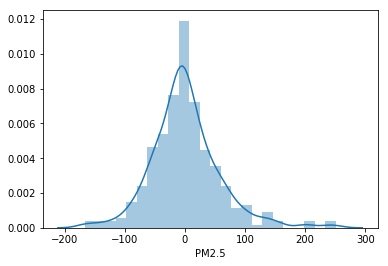

In [44]:
residual_xgb = y_test - xgb_regress_predict
sns.distplot(residual_xgb)

In [48]:
import pickle
xgb_regressor_file = open("xgb_regressor.pkl", "wb")
pickle.dump(xgb_regressor, xgb_regressor_file)